# Housing Price Prediction Assignment

## Problem Statement

### **************************************************************************************************************

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

#### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

#### The company wants to know:

#### Which variables are significant in predicting the price of a house, and

#### How well those variables describe the price of a house.



### **************************************************************************************************************

## Business Goal

### **************************************************************************************************************

#### This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### **************************************************************************************************************

# STEP 1: Understanding the Data

In [37]:
# importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [193]:
pip show matplotlib


Name: matplotlib
Version: 3.7.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/shwetha/anaconda3/lib/python3.10/site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn, sweetviz
Note: you may need to restart the kernel to use updated packages.


In [9]:
df = pd.read_csv("train.csv",keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [10]:
df.shape

(1460, 81)

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df[['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
   'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']] = df[['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
   'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']].replace("NA","None")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

### Checking the data types of the coloumns
#### - MSSubClass, OverallQual, OverallCond need to be converted to object type
#### - LotFrontage and MasVnrArea needs to be converted to numeric type


In [14]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df[['MSSubClass','OverallQual','OverallCond']] = df[['MSSubClass','OverallQual','OverallCond']].astype('object')

In [16]:
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors = 'coerce')

In [17]:
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors = 'coerce')

In [18]:
df[['MSSubClass','OverallQual','OverallCond','LotFrontage','MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [19]:
df.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# STEP 2 : EDA

## Univariate Analysis

<Figure size 1000x800 with 0 Axes>

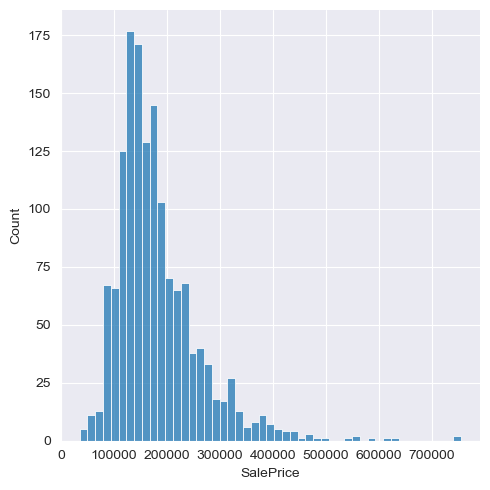

In [22]:
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.displot(df['SalePrice'])

In [23]:
## The Target Variable is right-skewed
df['SalePrice'].skew()

1.8828757597682129

In [24]:
df['SalePrice'].kurt()

6.536281860064529

### _the target variable is skewed greater than 1 and distribution is high

### Reduce the skew by taking log

In [25]:
df['SalePrice'] = np.log(df['SalePrice'])

In [26]:
df['SalePrice'].skew()

0.12133506220520406

In [27]:
df['SalePrice'].kurt()

0.8095319958036296

<Figure size 1000x800 with 0 Axes>

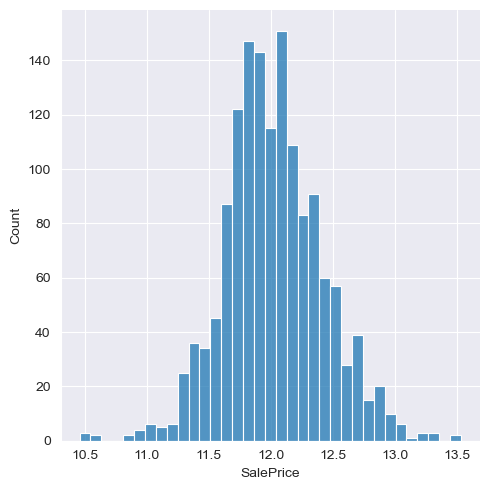

In [28]:
plt.figure(figsize=[10,8])
sns.displot(df['SalePrice'])

In [29]:
df_numeric_col = df.select_dtypes(include=['int64','float64'])
df_numeric_col.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,12.429216


In [56]:
df_categorical_col = df.select_dtypes(include='object')
df_categorical_col.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


### Analysing Numerical Columns

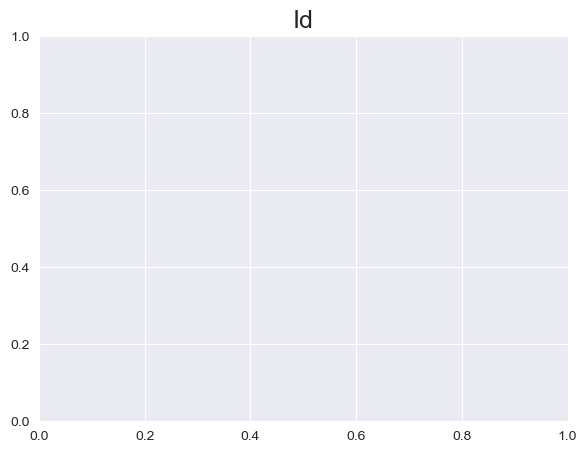

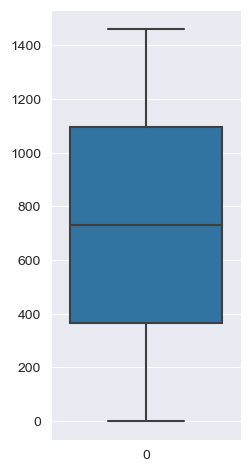

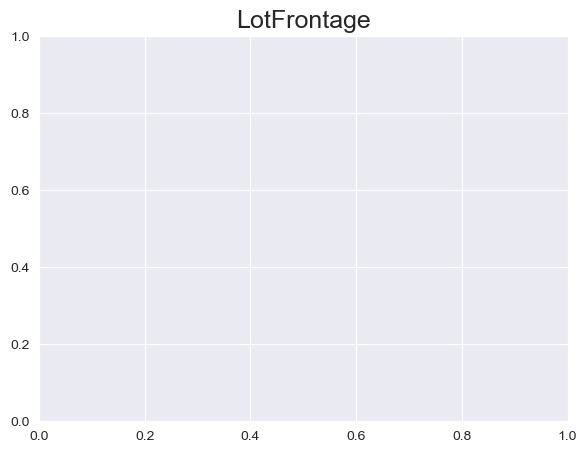

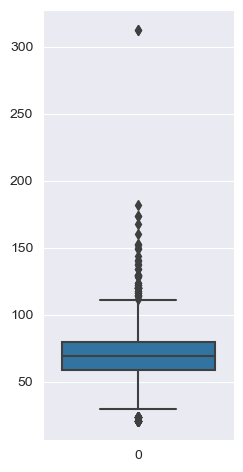

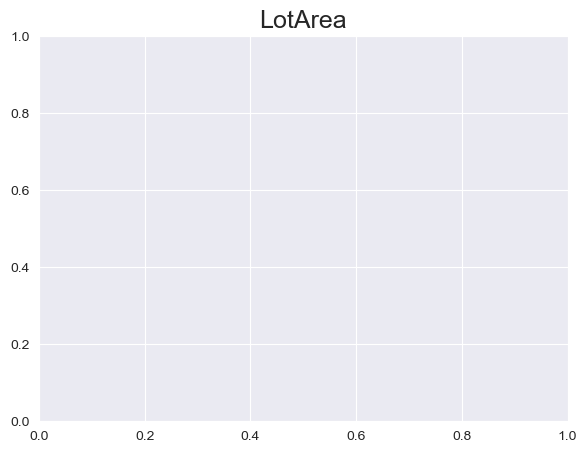

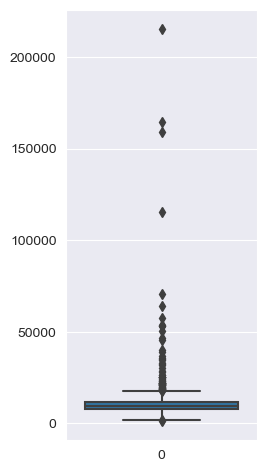

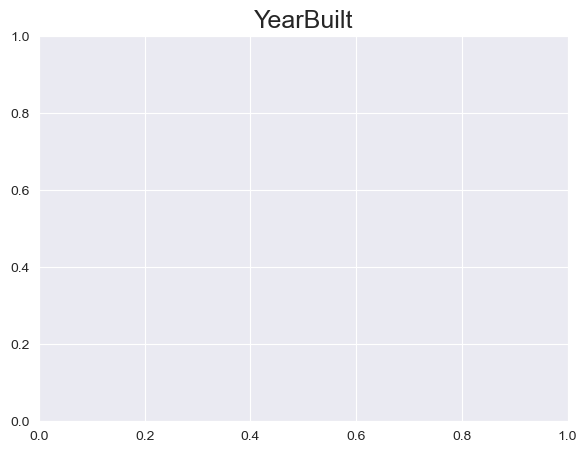

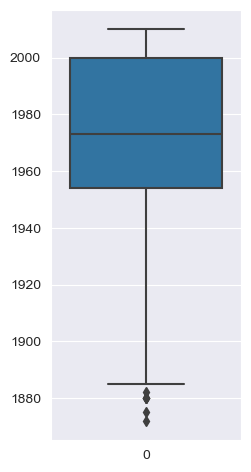

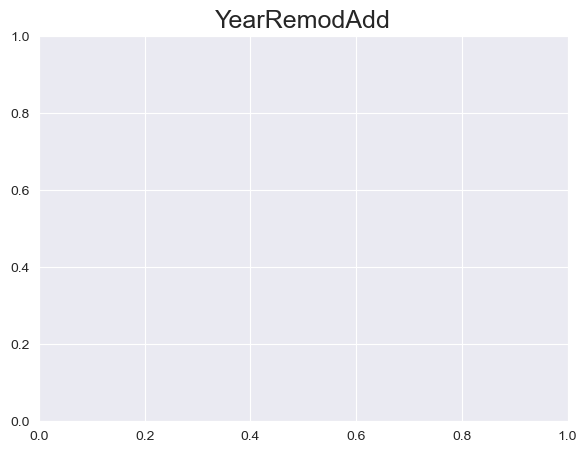

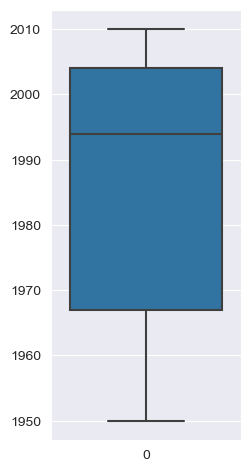

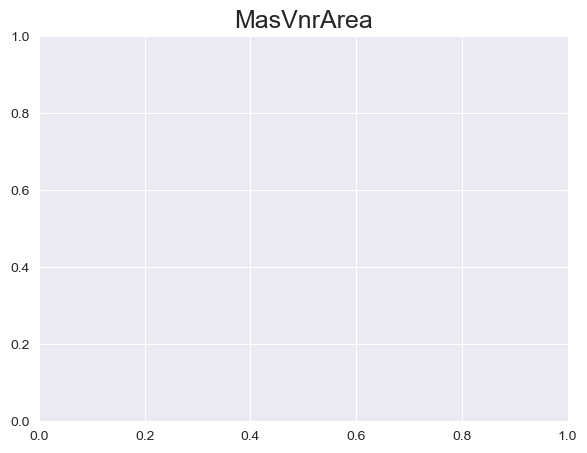

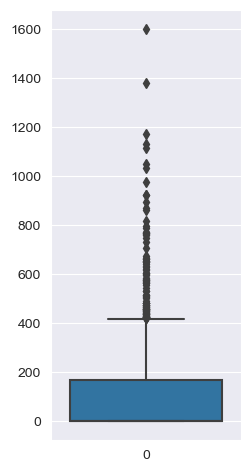

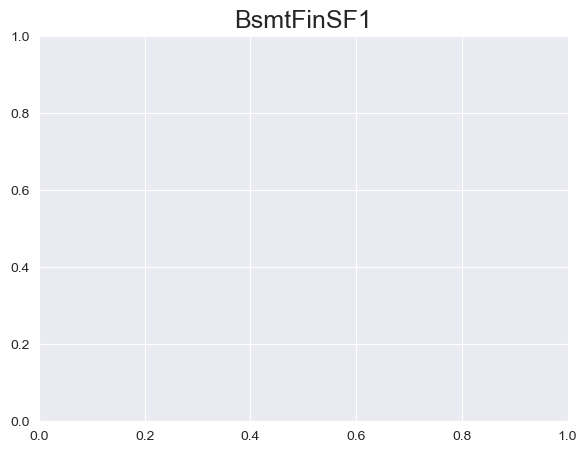

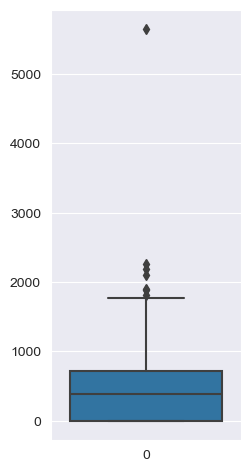

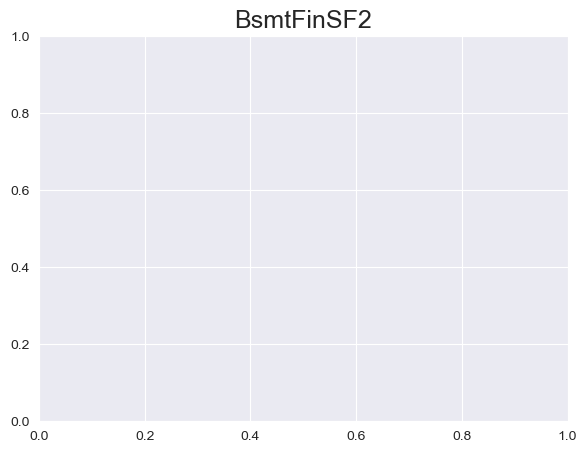

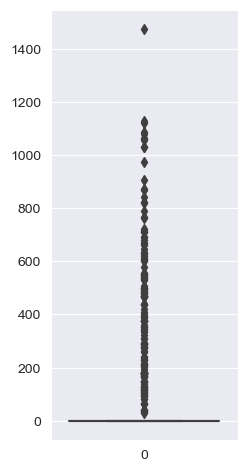

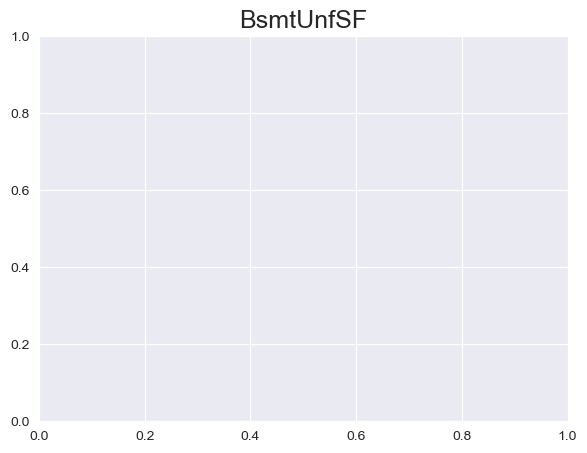

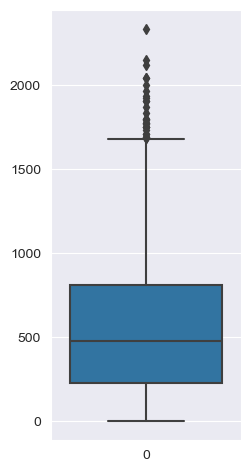

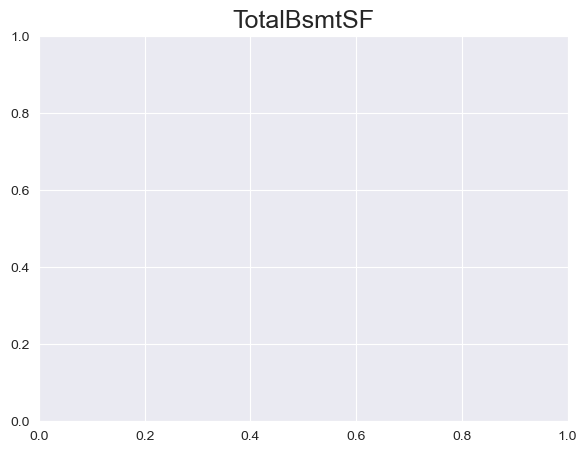

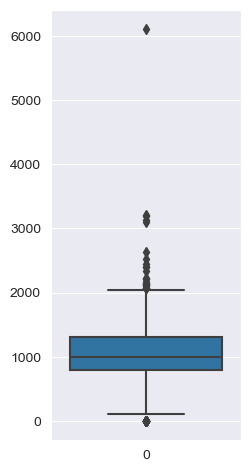

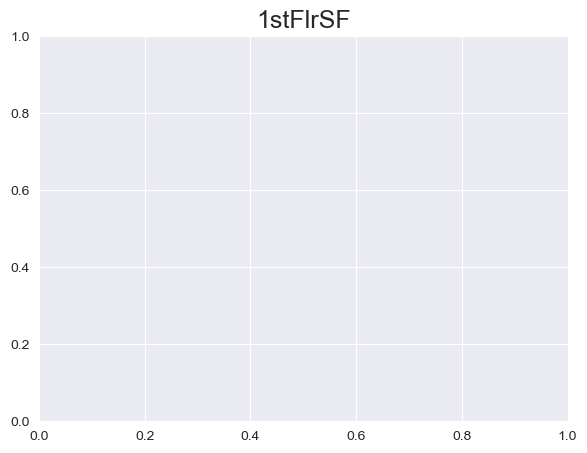

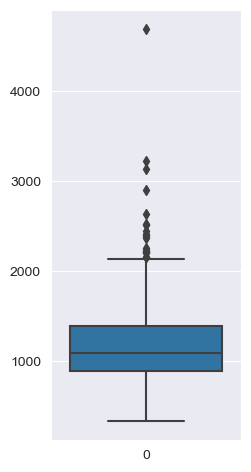

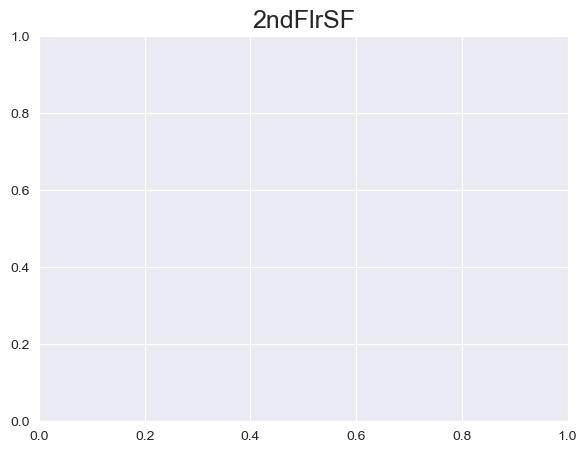

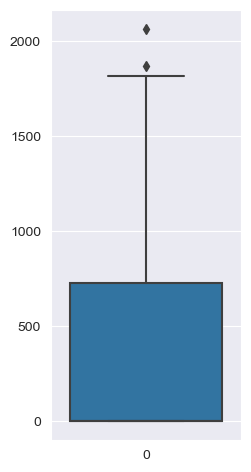

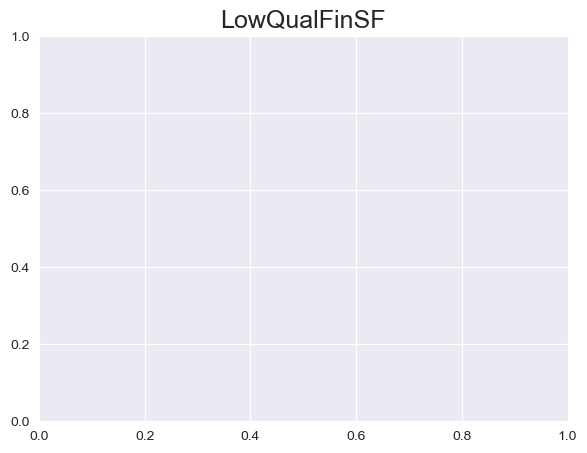

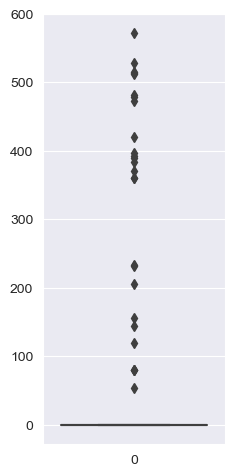

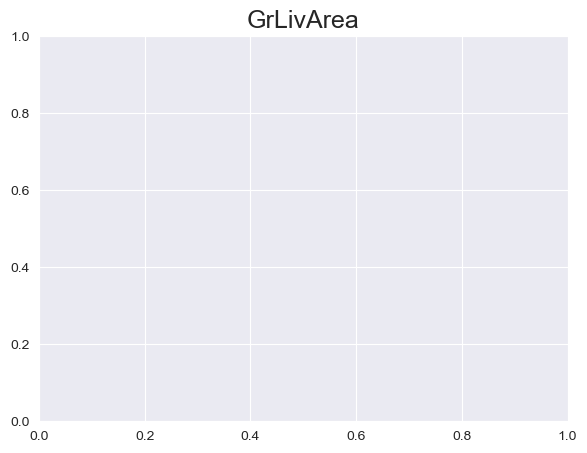

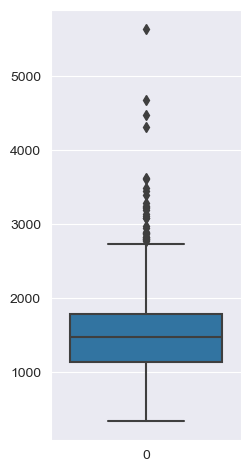

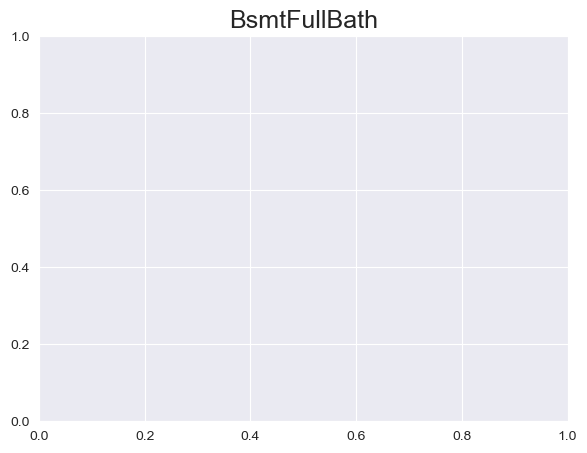

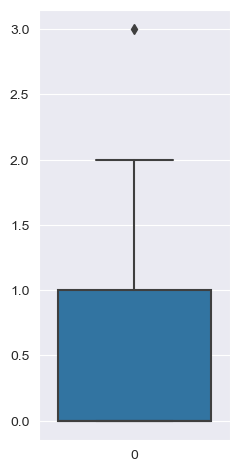

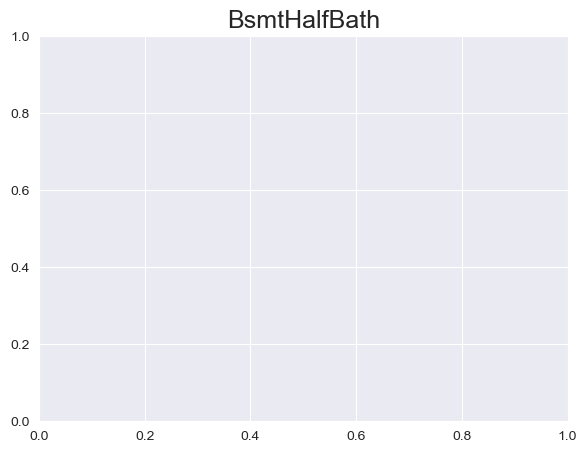

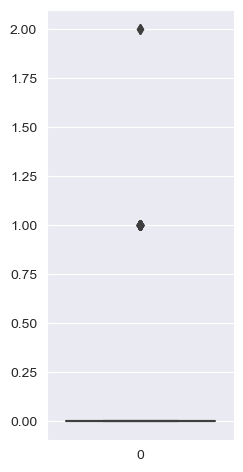

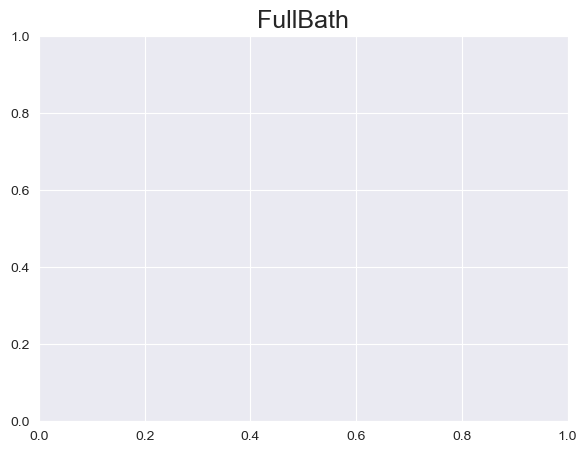

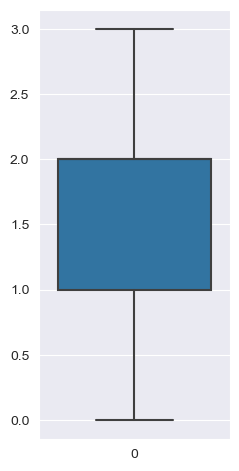

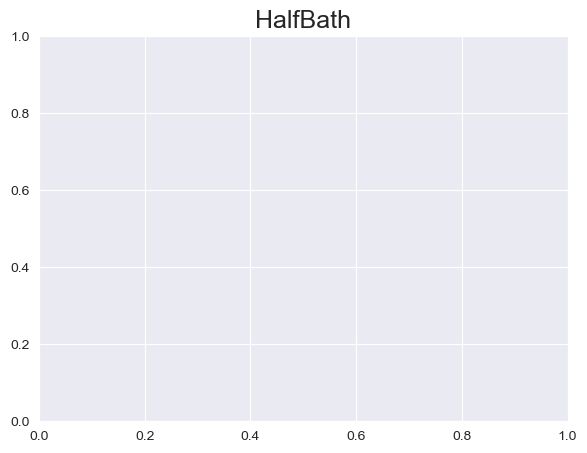

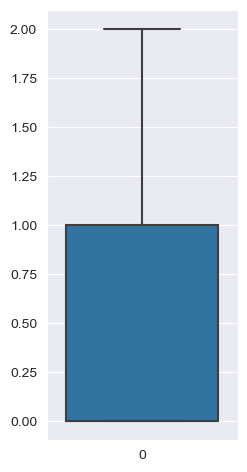

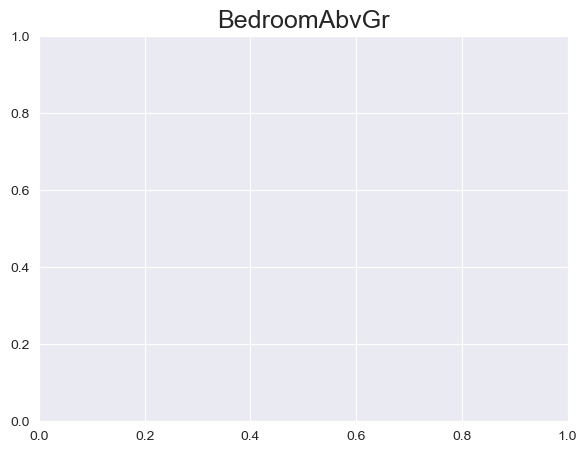

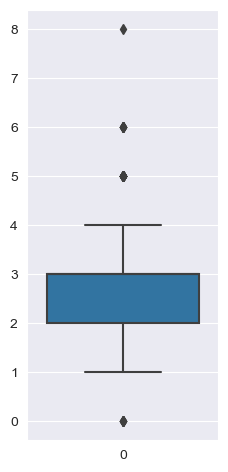

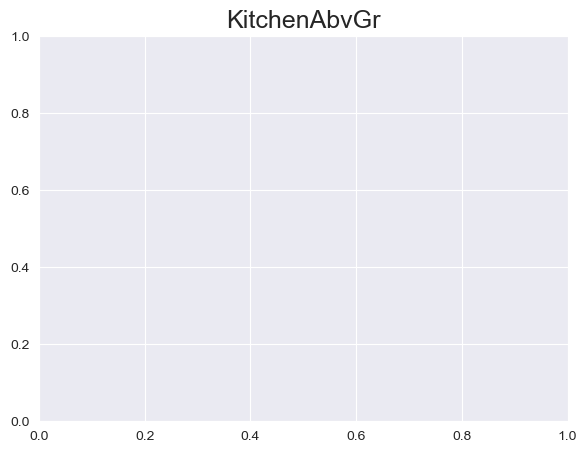

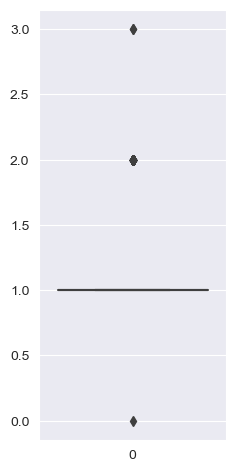

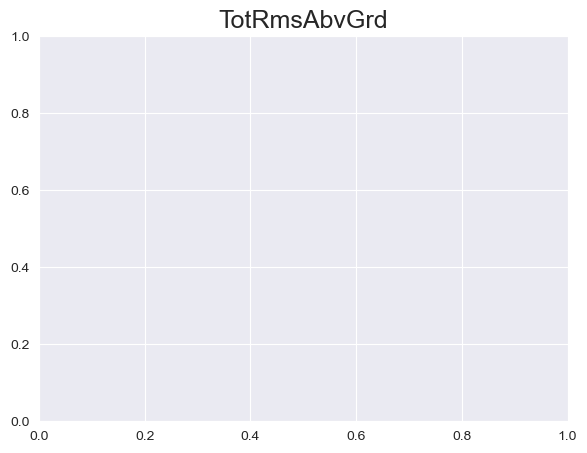

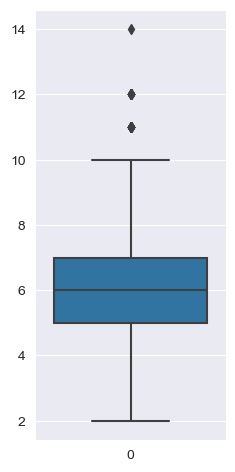

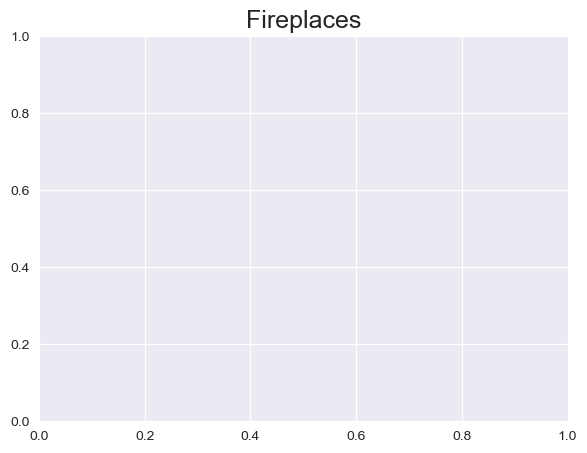

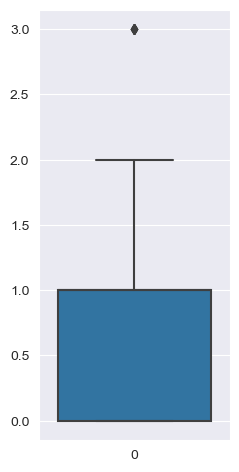

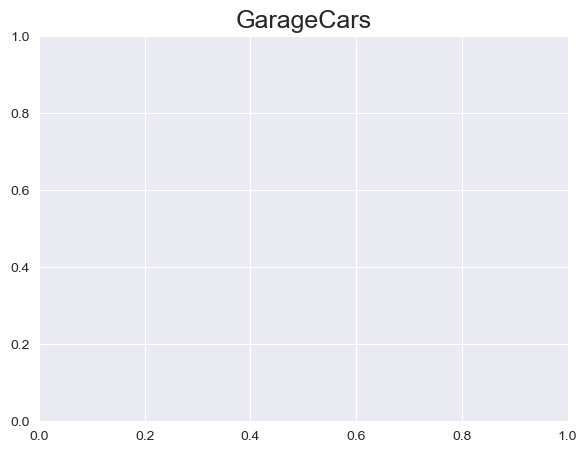

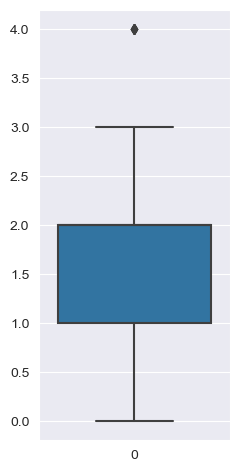

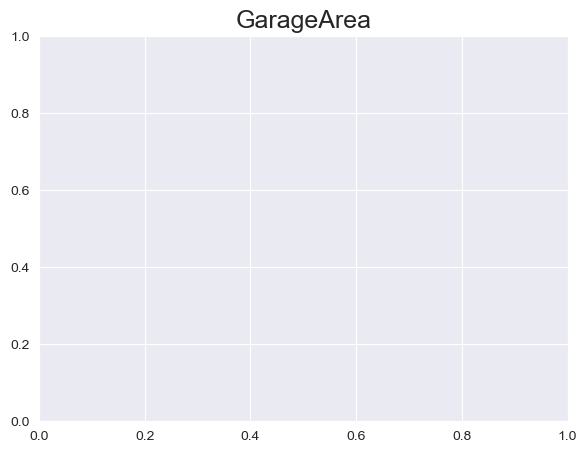

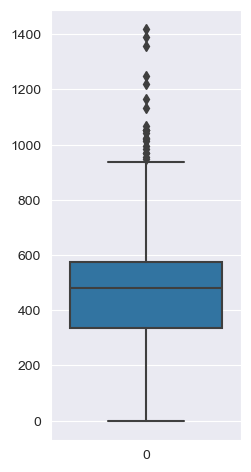

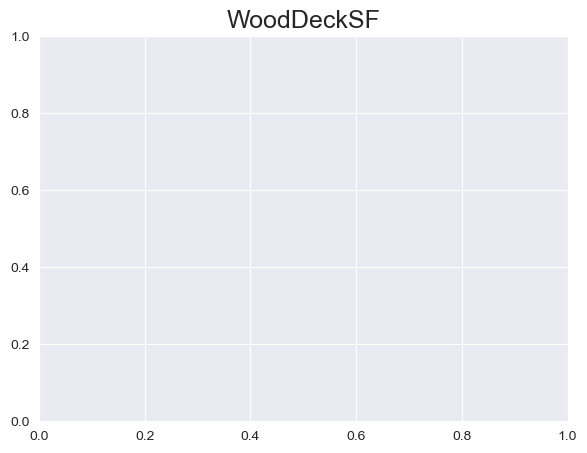

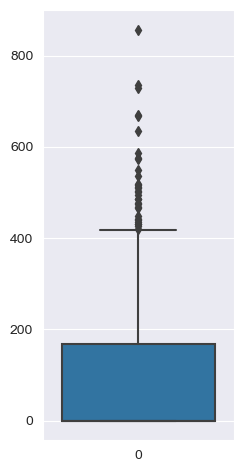

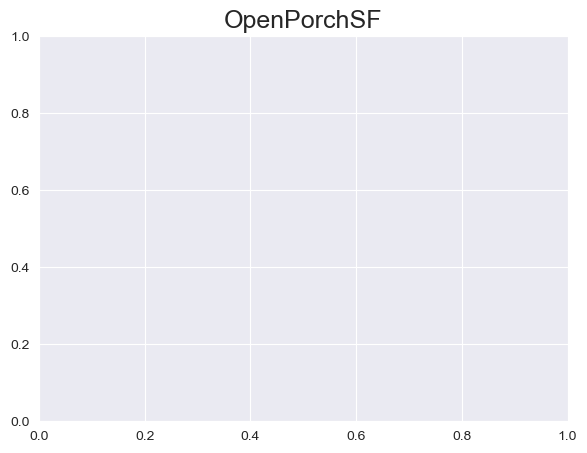

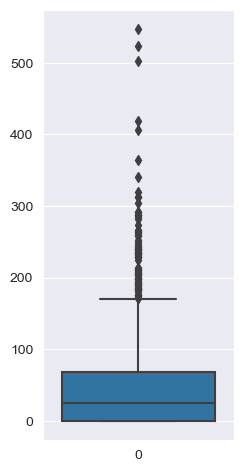

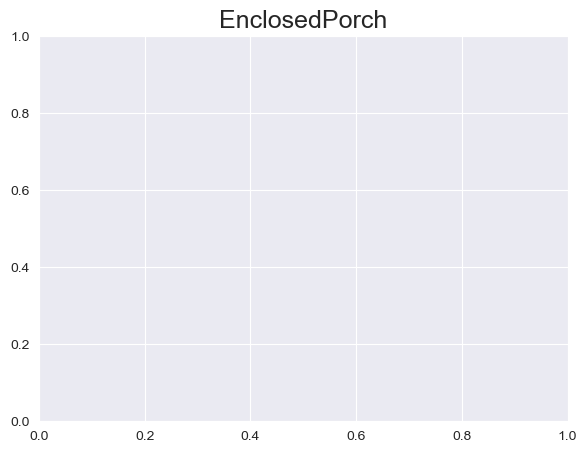

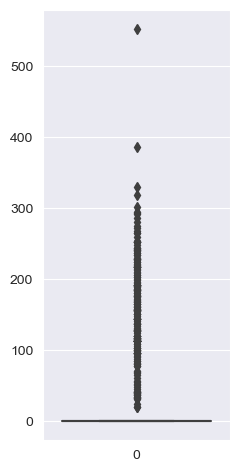

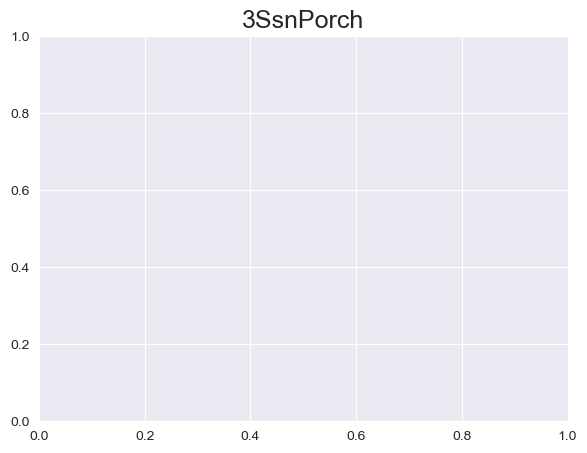

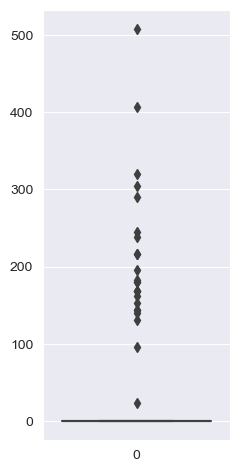

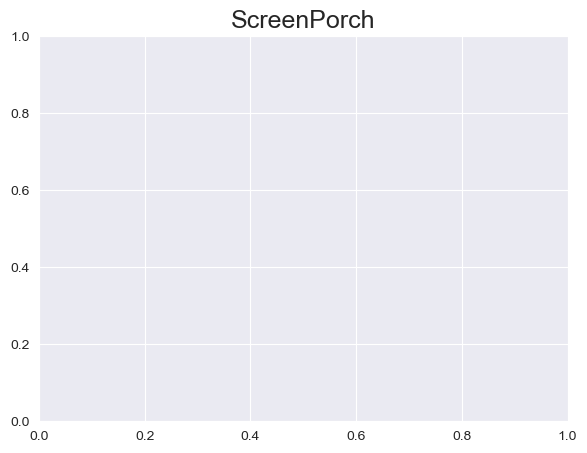

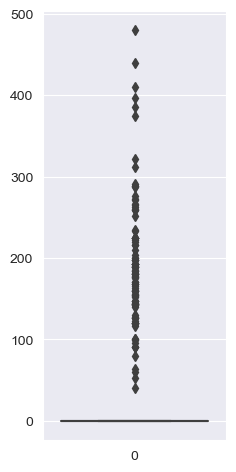

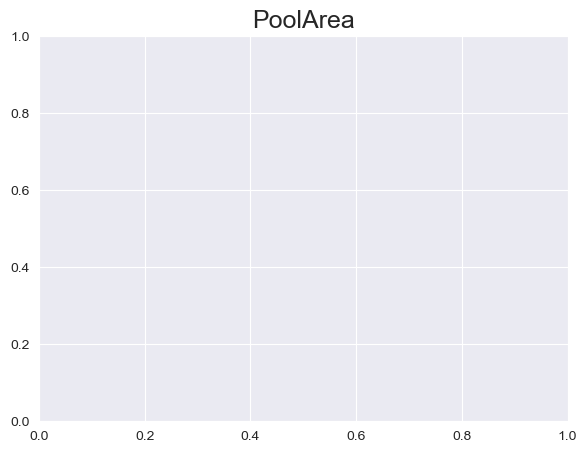

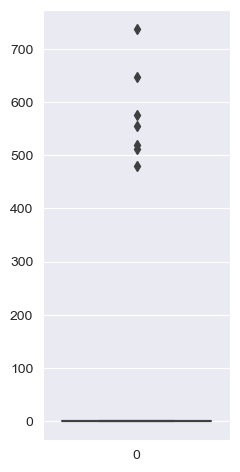

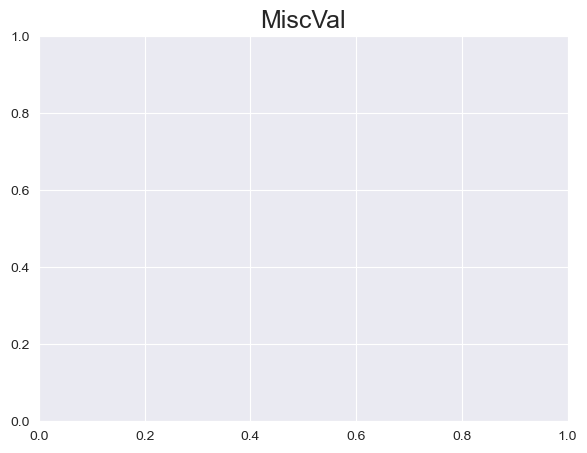

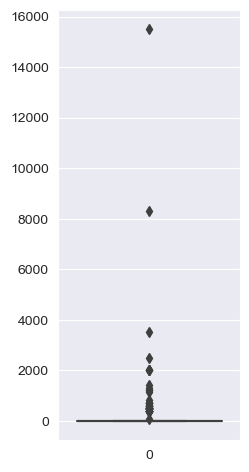

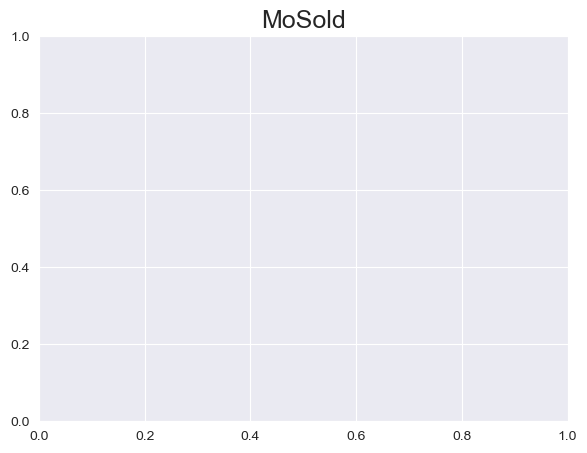

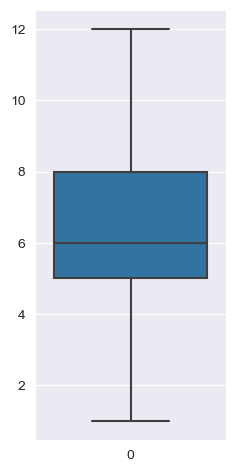

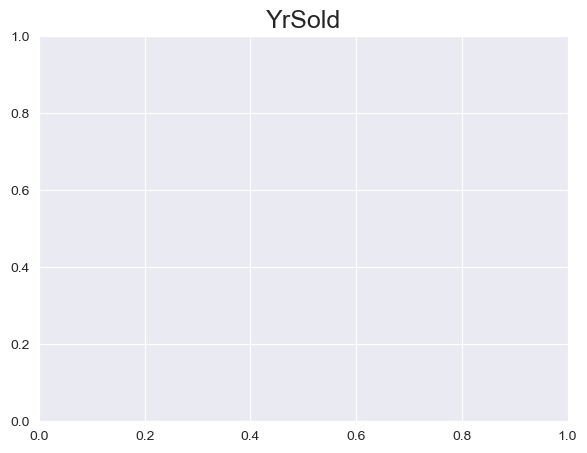

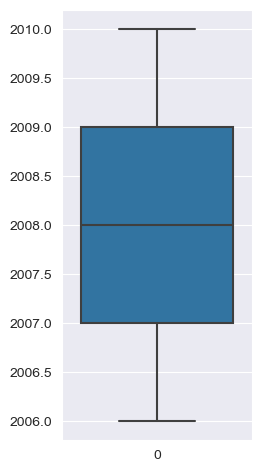

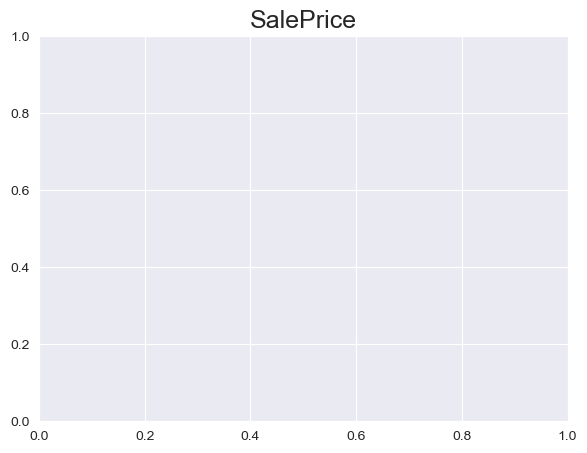

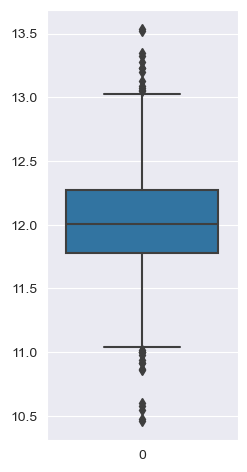

In [55]:
for col in df_numeric_col.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col,fontdict={'fontsize': 18})
    sns.displot(df_numeric_col[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_numeric_col[col])
    plt.show()

### Analysing Categorical  Columns

In [54]:
for col in df_categorical_col.columns:
    print(col)
    print(df[col].unique(),'\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

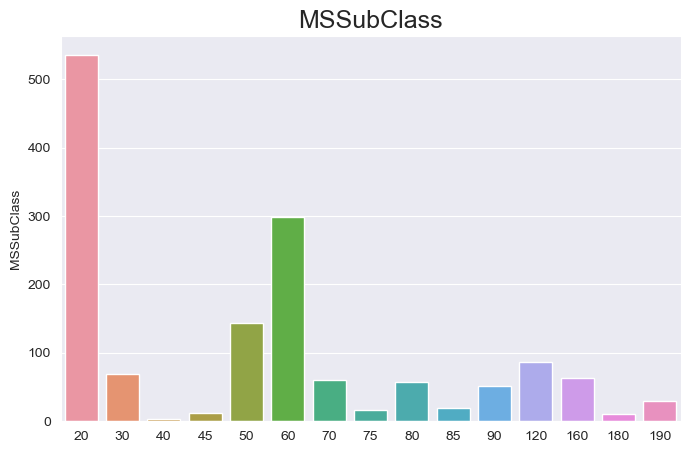

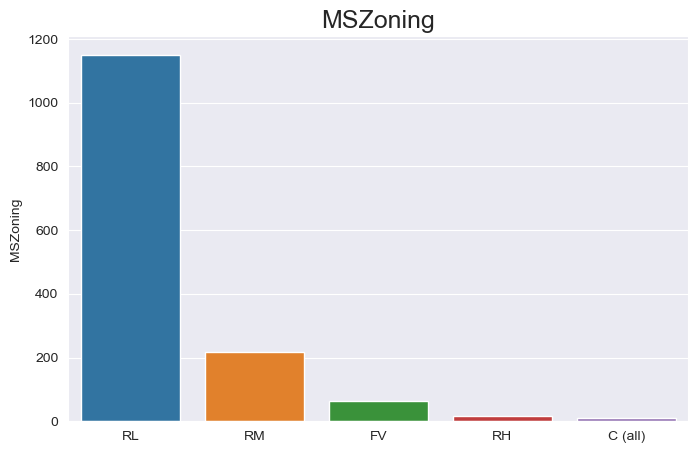

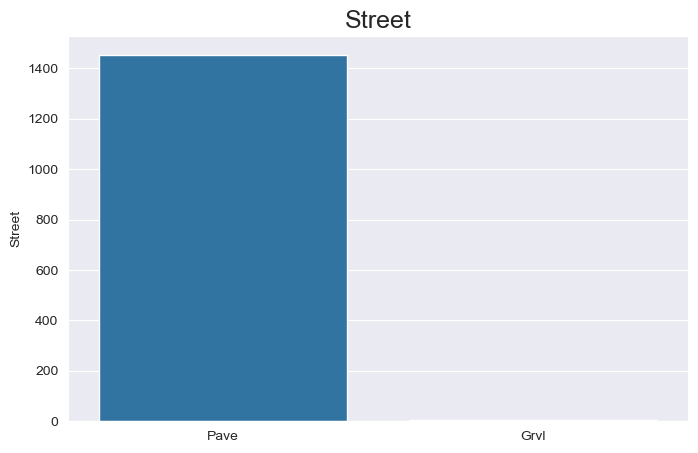

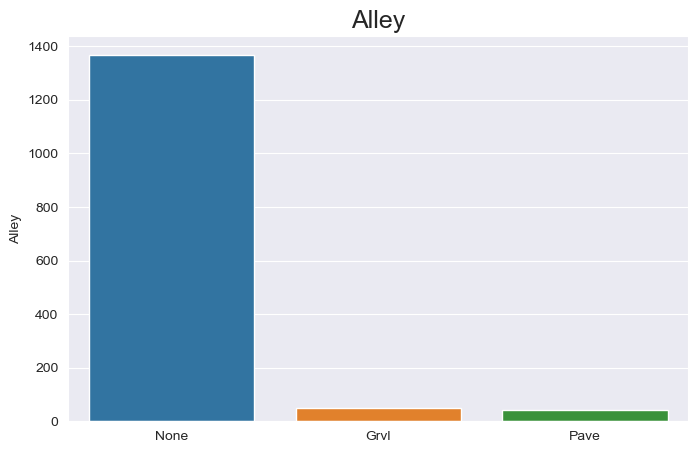

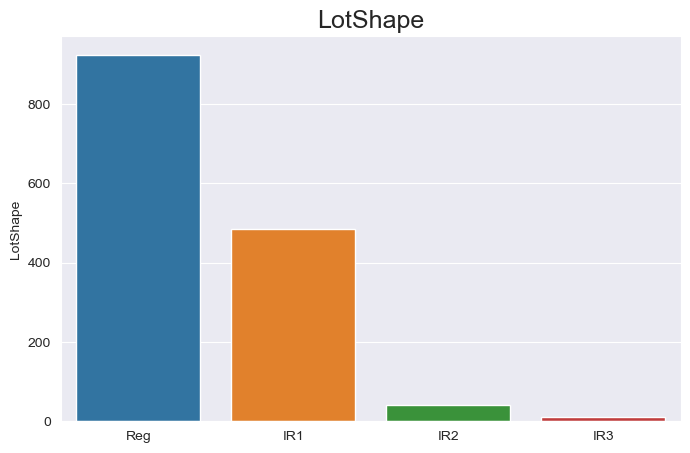

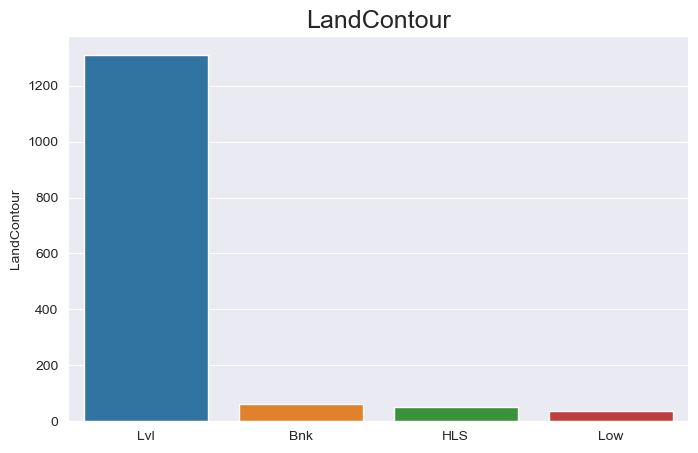

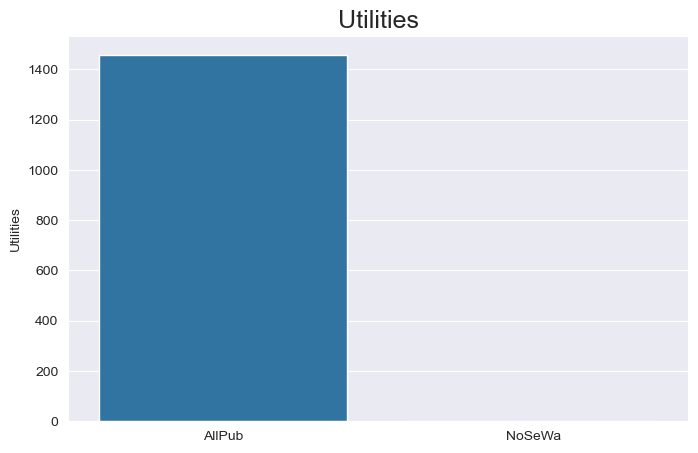

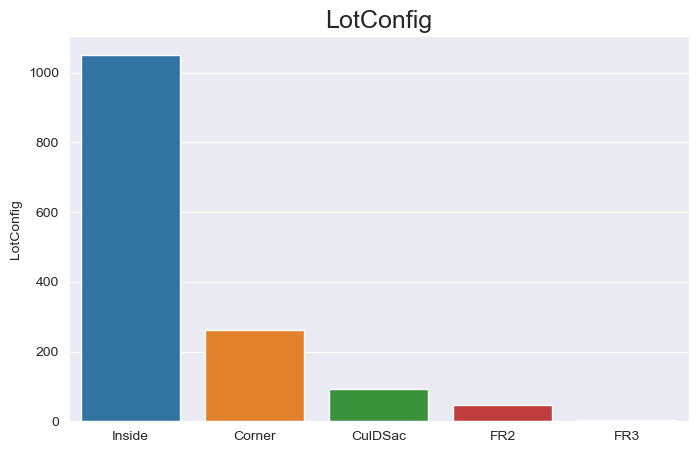

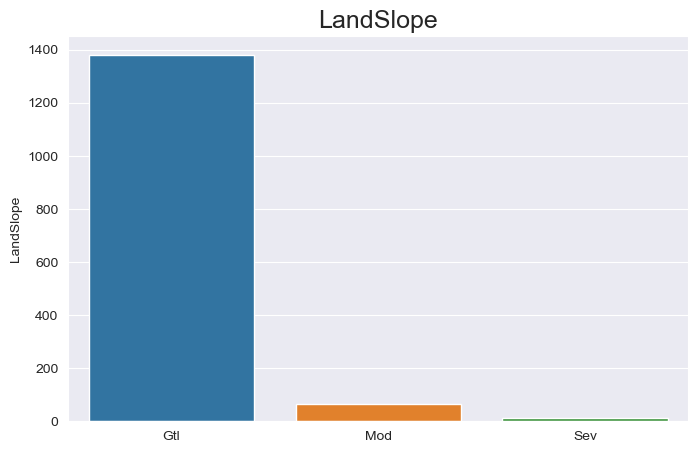

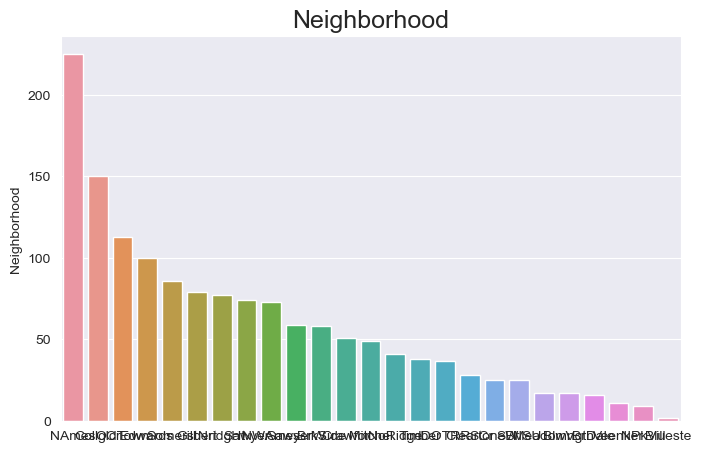

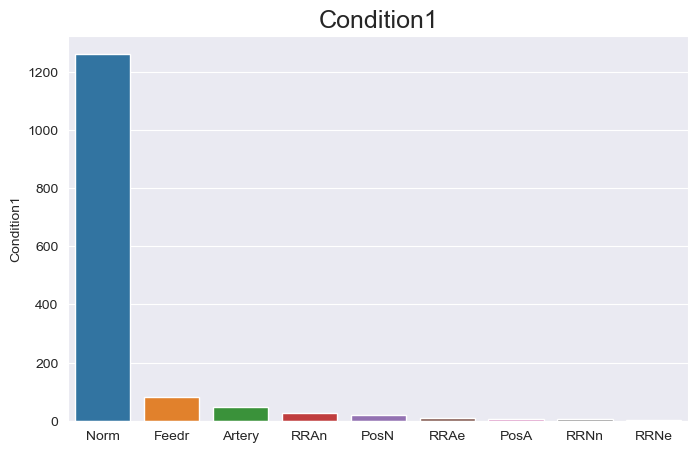

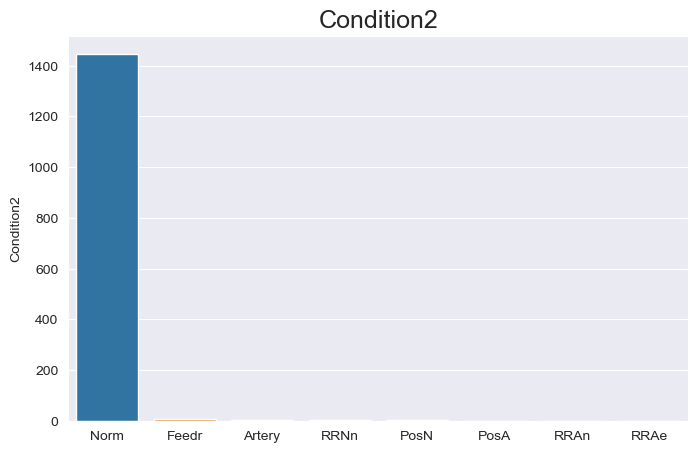

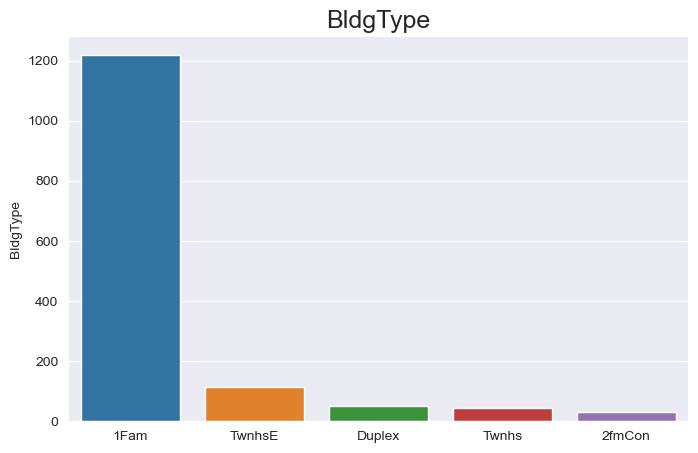

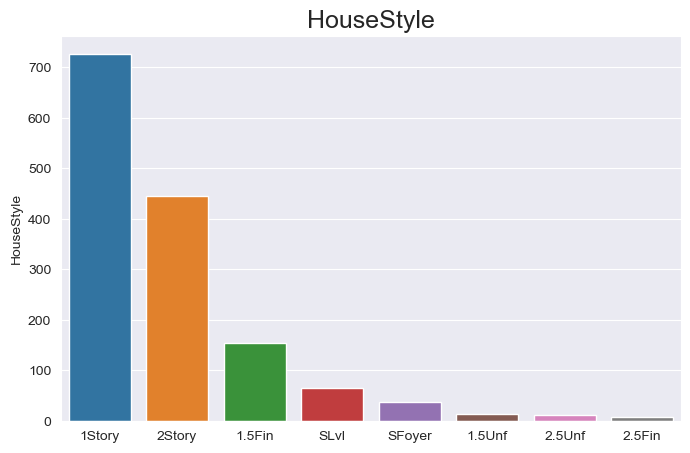

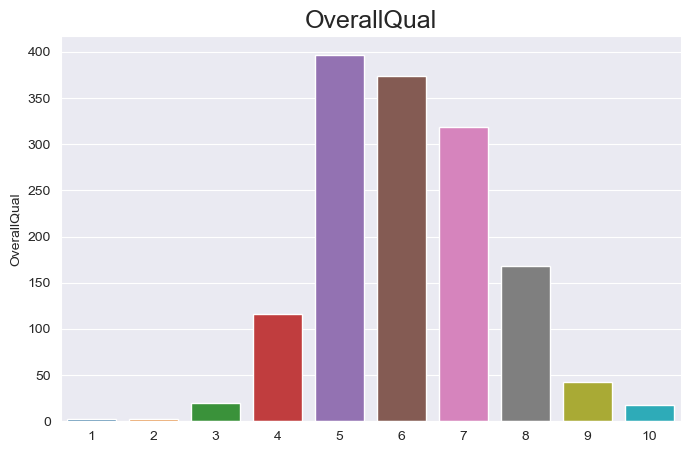

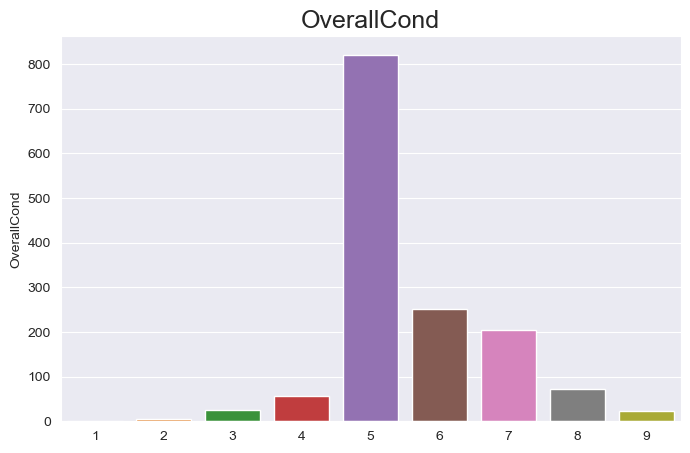

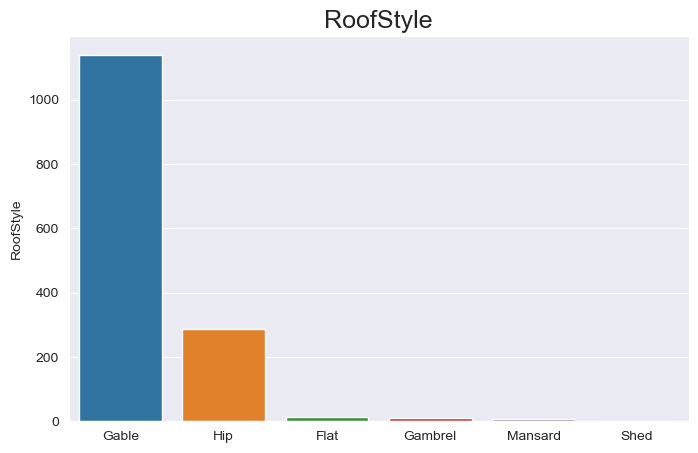

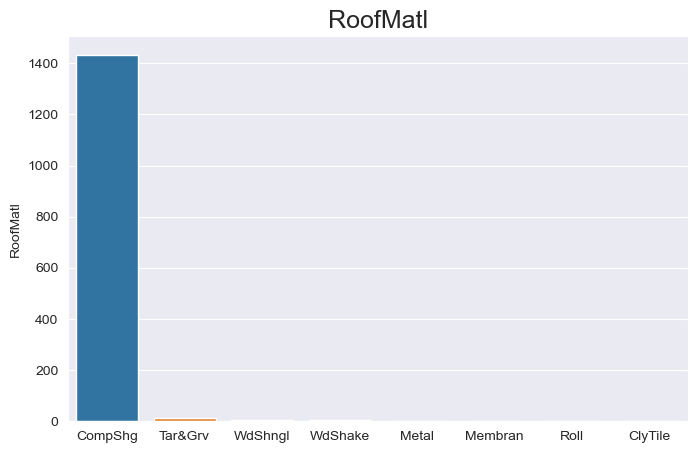

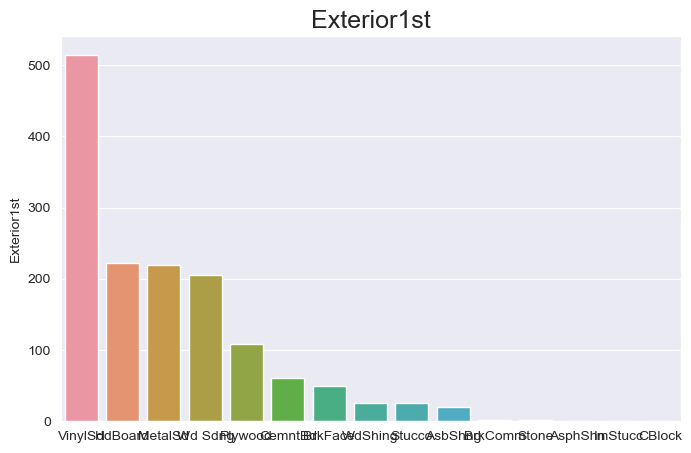

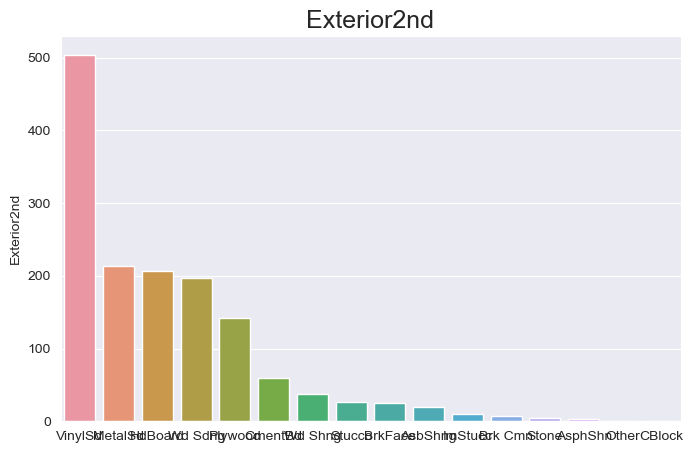

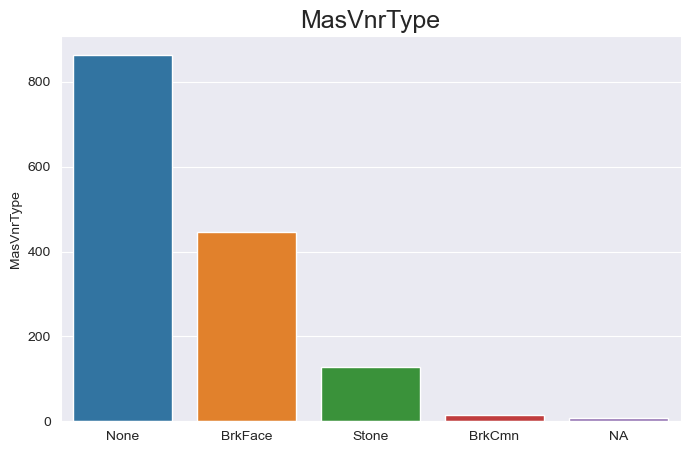

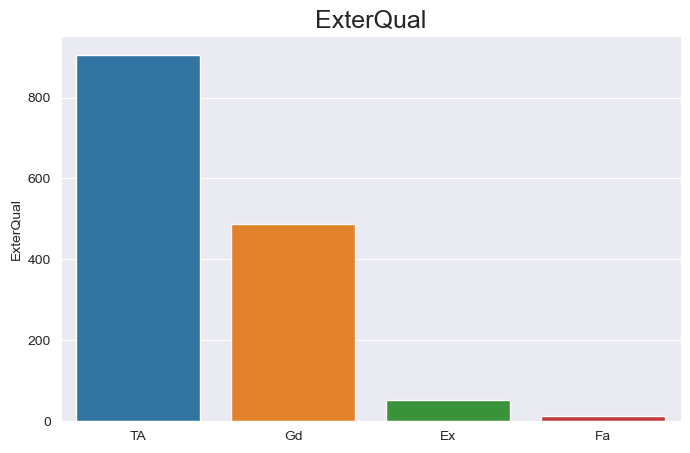

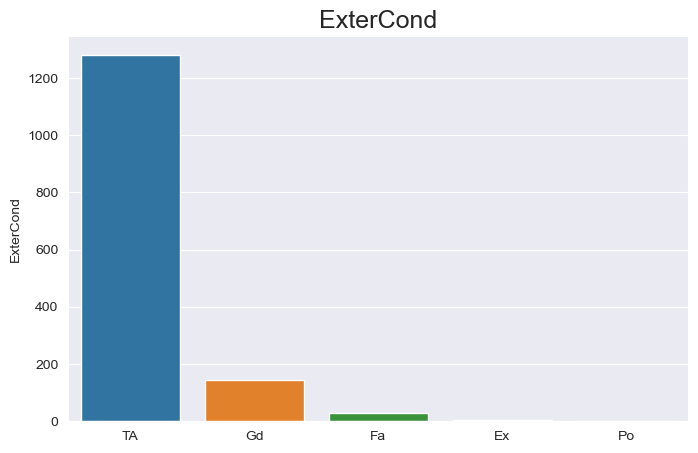

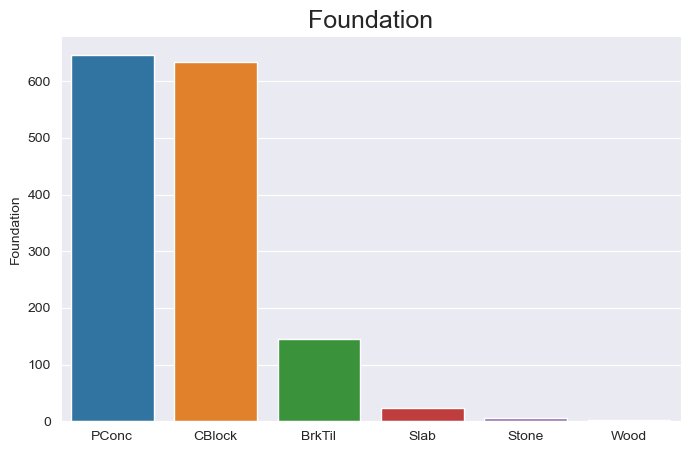

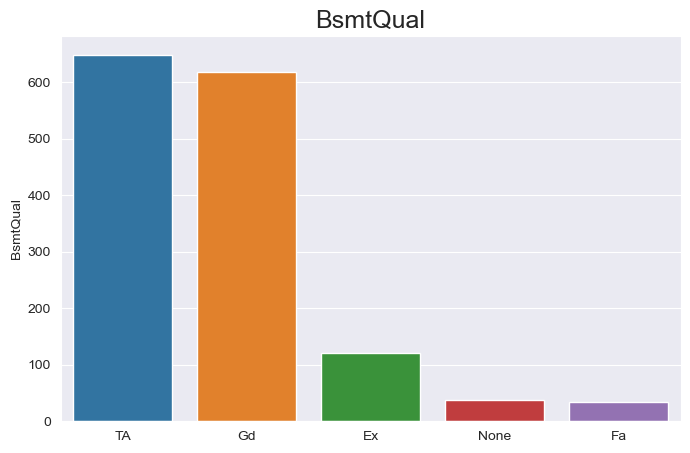

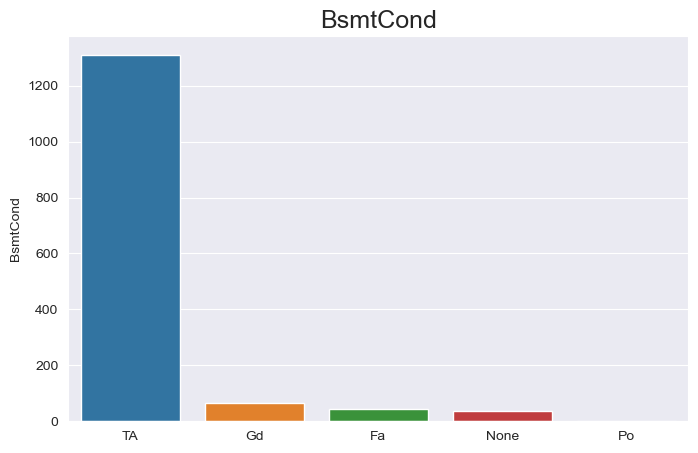

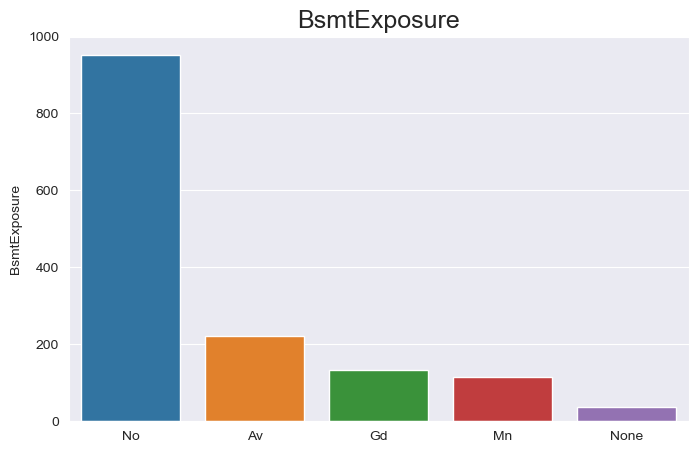

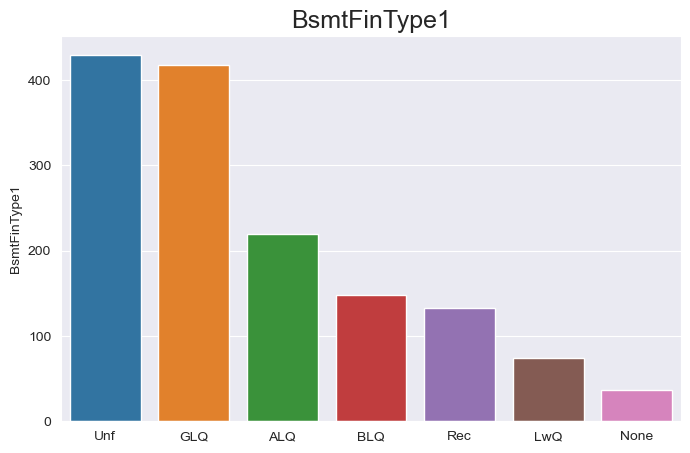

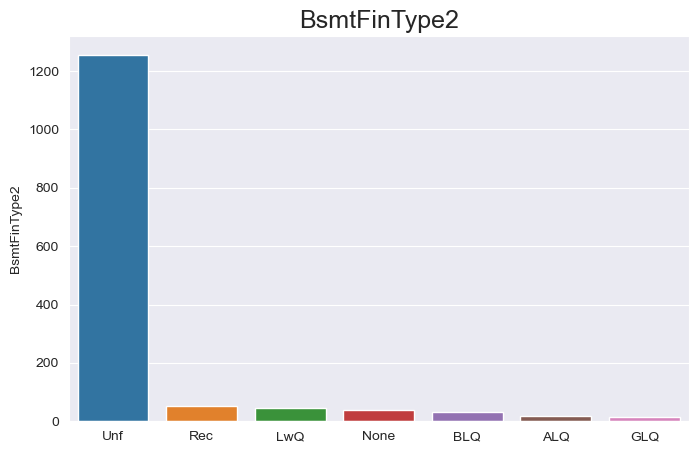

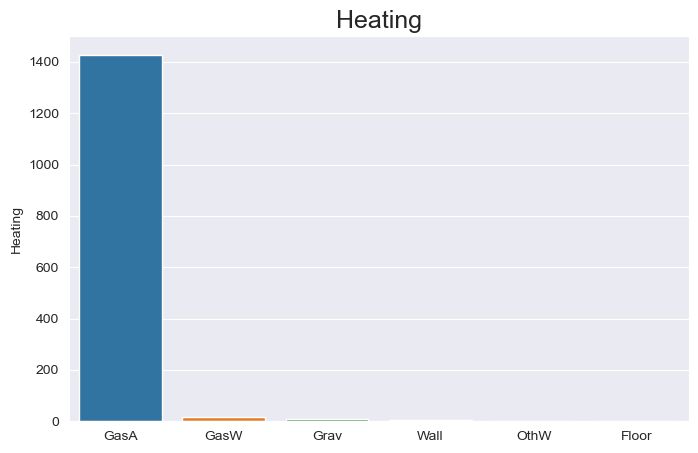

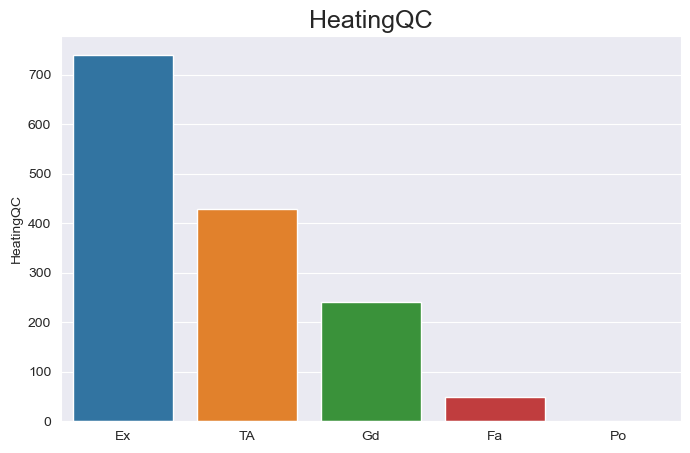

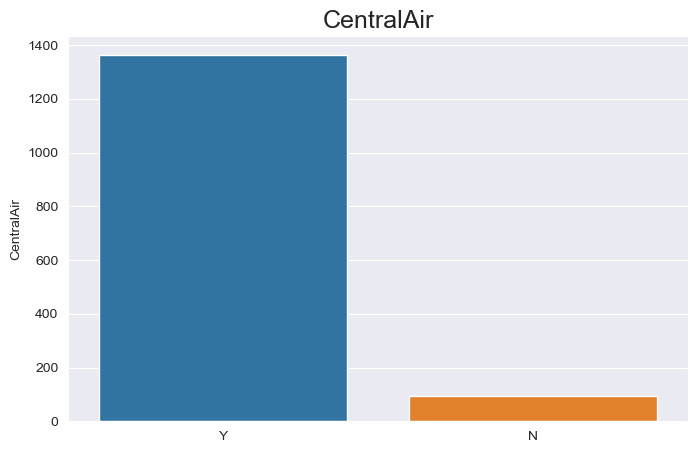

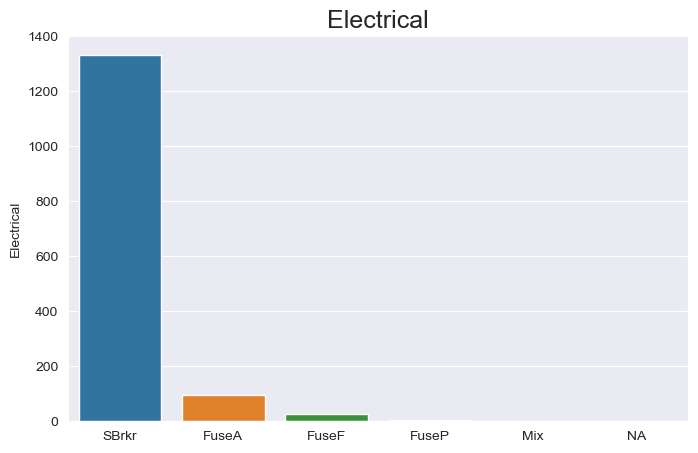

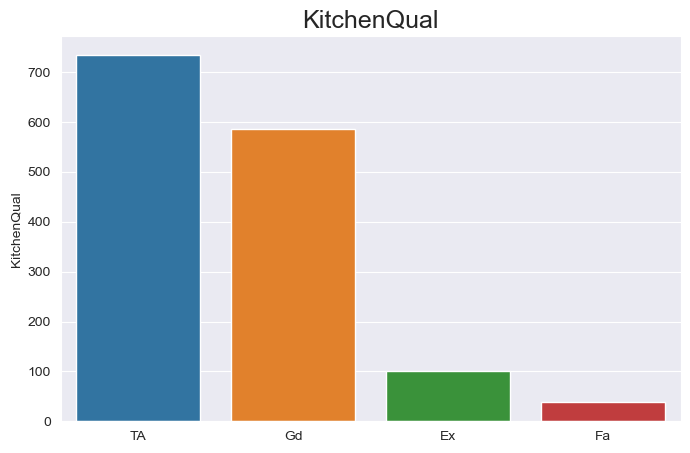

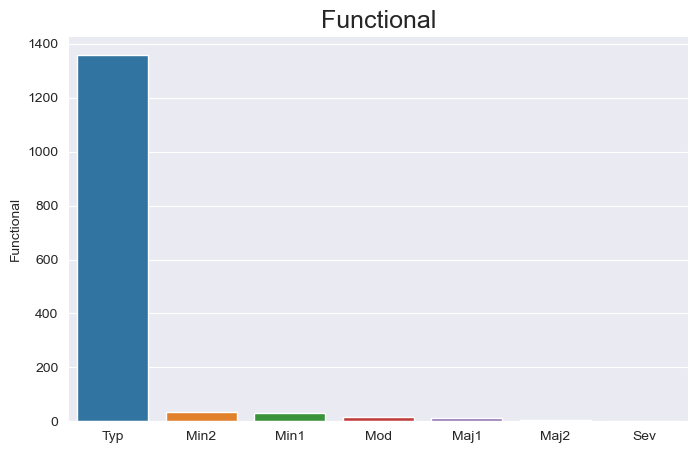

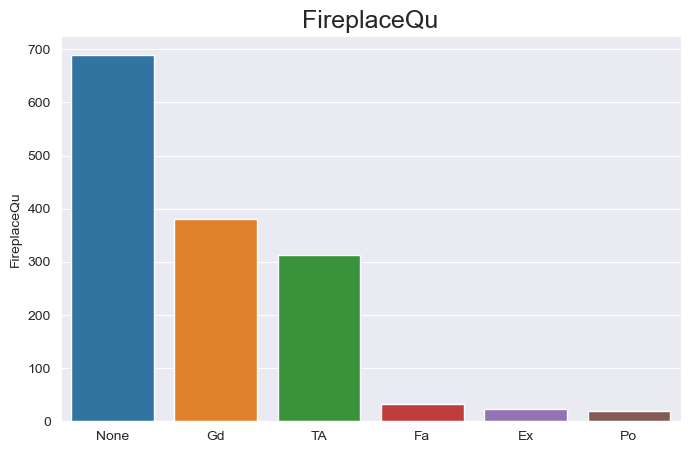

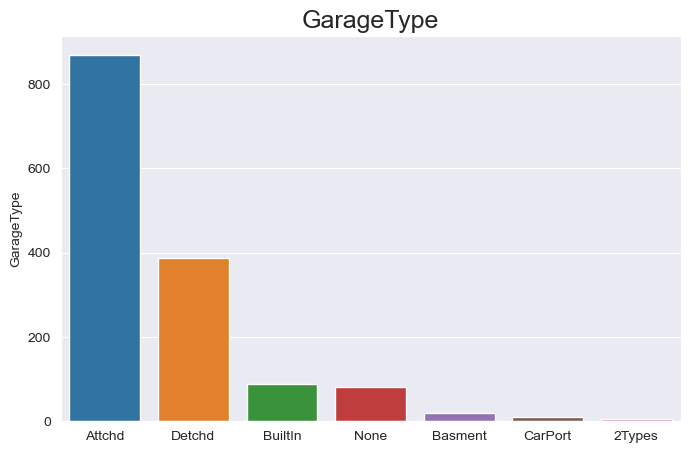

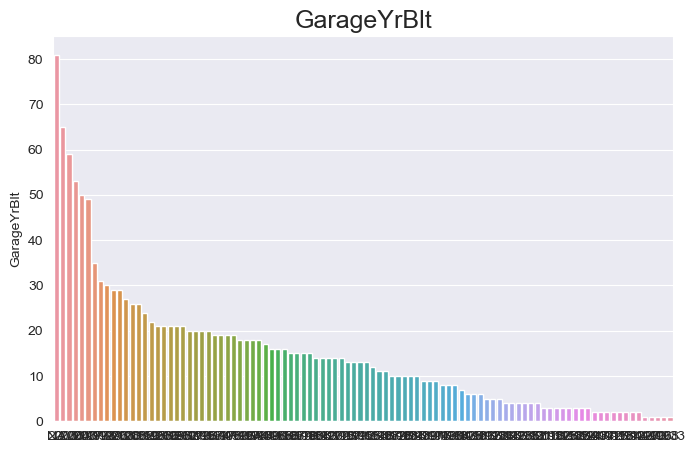

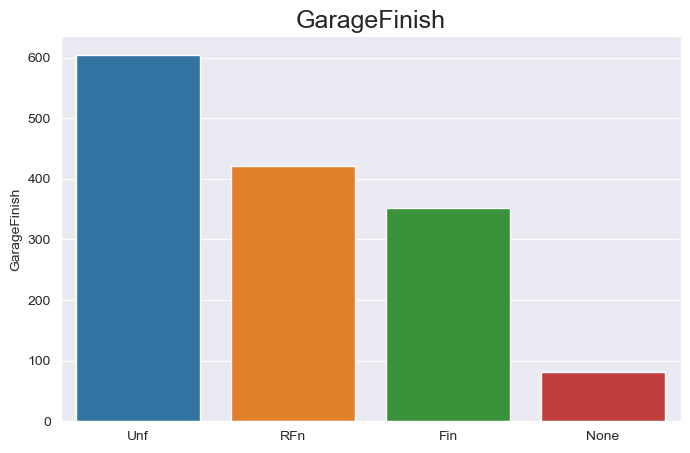

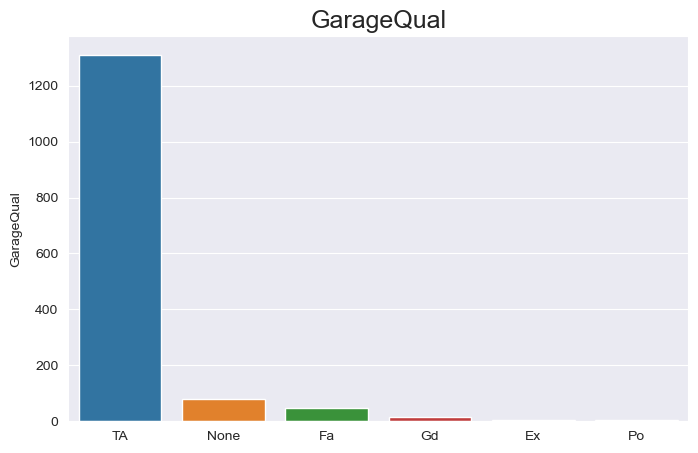

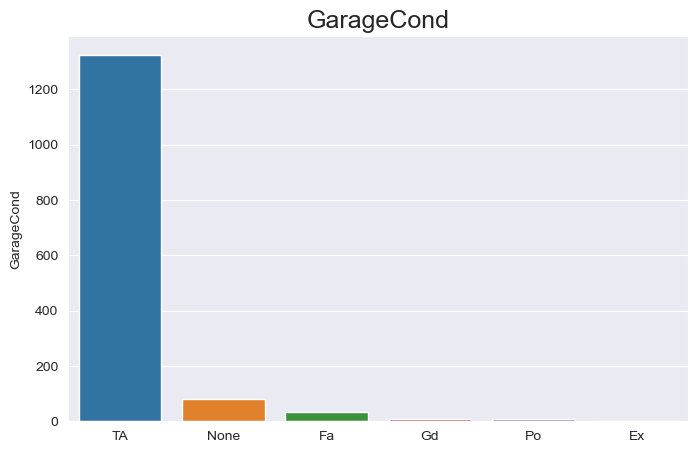

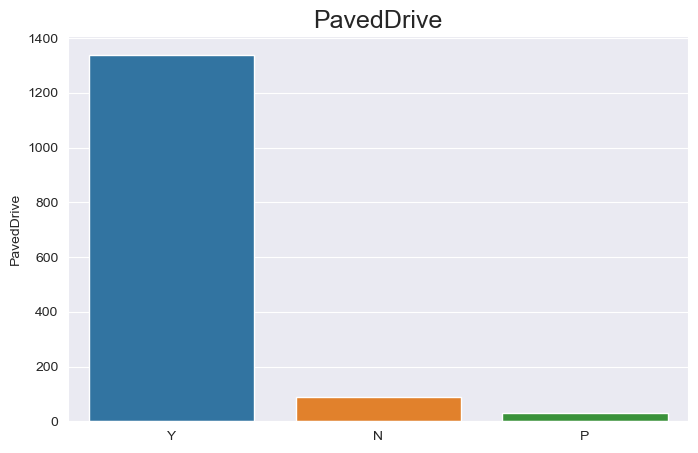

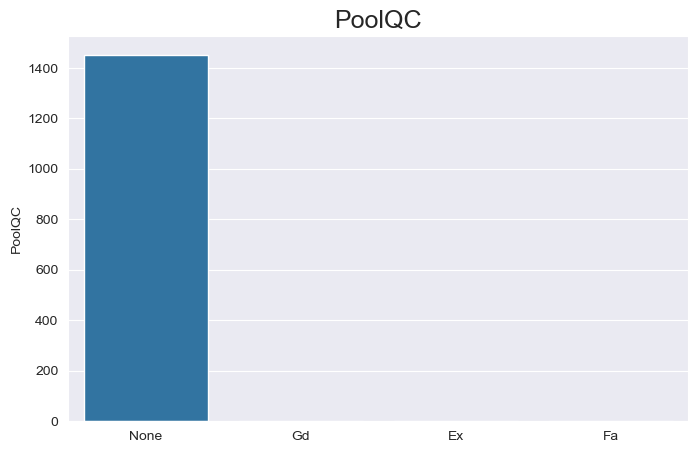

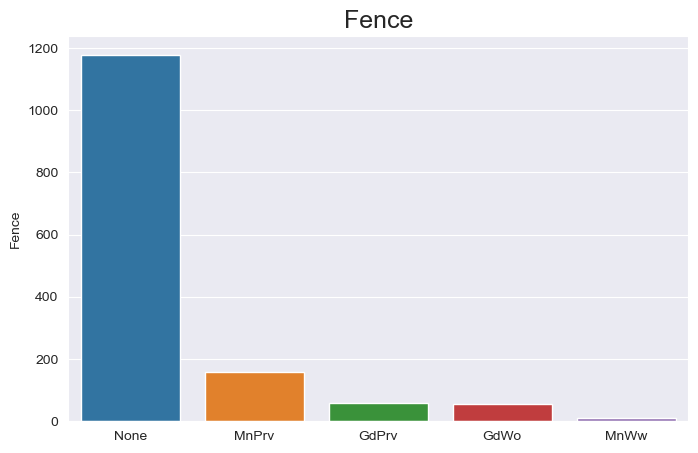

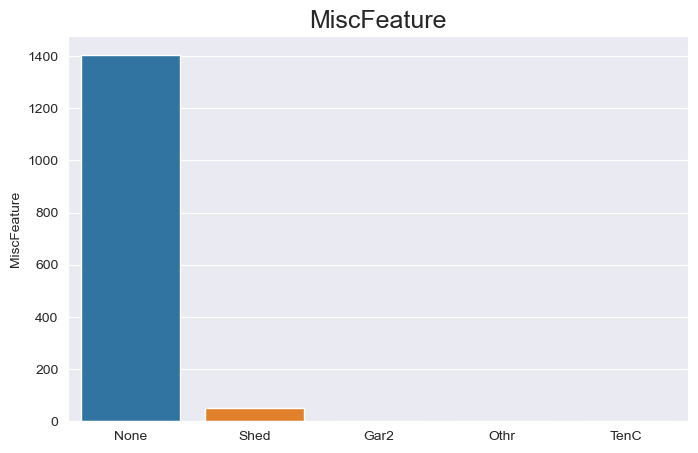

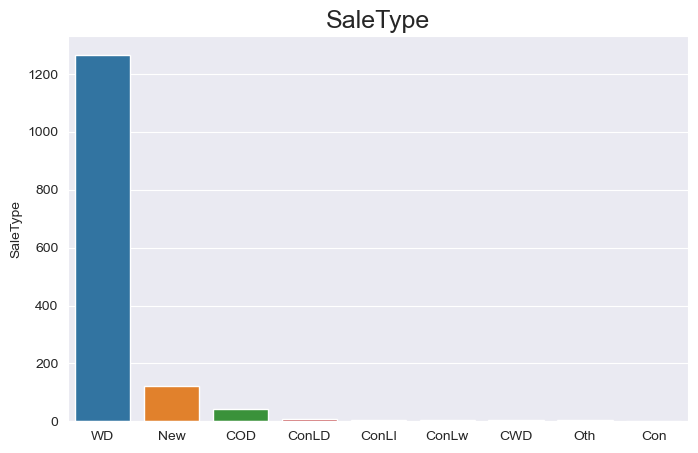

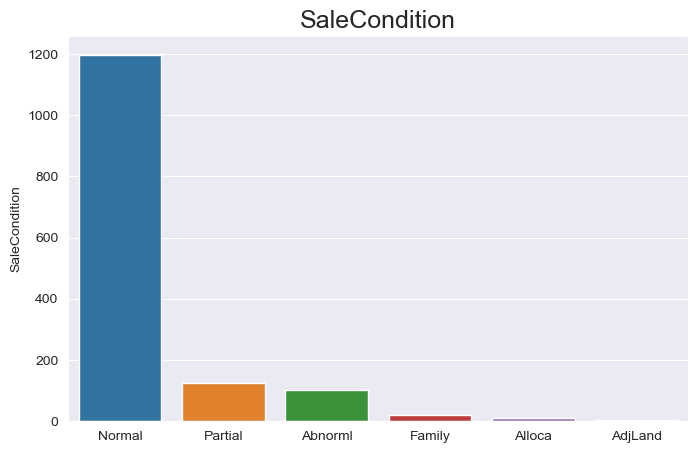

In [58]:
for col in df_categorical_col.columns:
    plt.figure(figsize=(8,5))
    plt.title(col,fontdict={'fontsize' : 18})
    sns.barplot(x=df_categorical_col[col].value_counts().index,y=df_categorical_col[col].value_counts())
    
    plt.show()

### Bivariate Analysis

<Axes: >

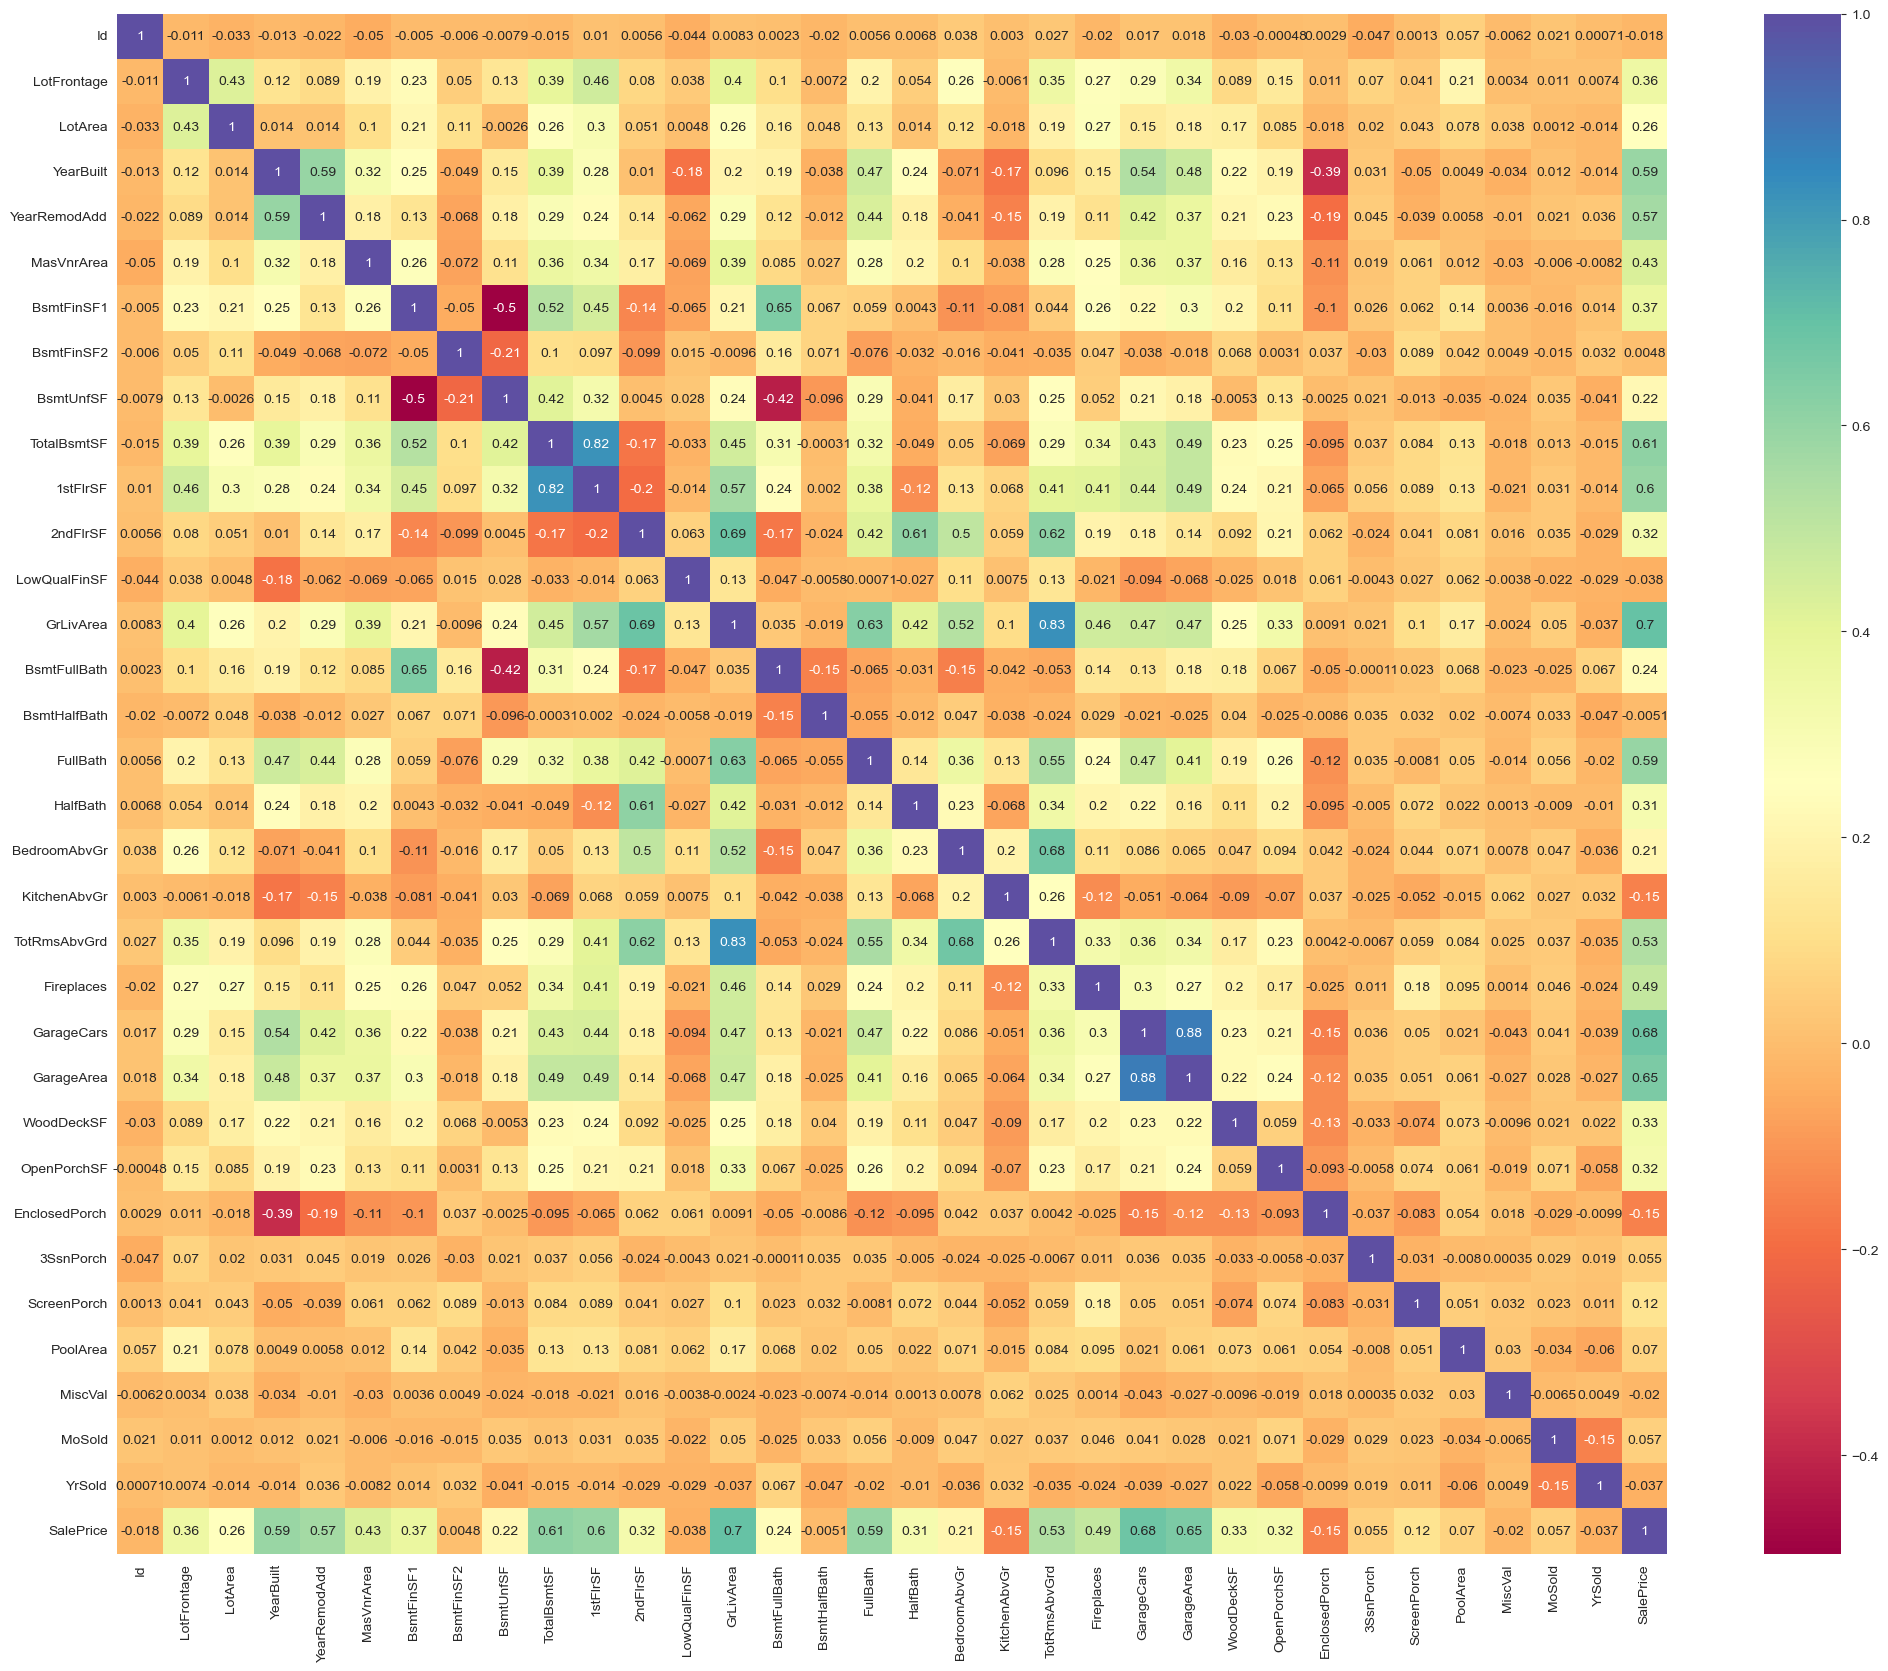

In [67]:
plt.figure(figsize=(25,20))
sns.heatmap(df_numeric_col.corr(),annot=True,cmap="Spectral")

#### Target Variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea

## STEP 3 : Feature Engineering

In [69]:
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']

In [70]:
df.drop(['YrSold','YearBuilt'],axis=1,inplace = True)

In [71]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,WD,Normal,12.429216,8


## STEP 4: Data Processing

In [73]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Age                0
Length: 80, dtype: int64

In [75]:
#Replacing the mssing values by mean value of the respective columns

df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)

In [78]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Age              0
Length: 80, dtype: int64

### Dummy Variable Creation

In [79]:
df_num = df.select_dtypes(include=['int64','float64'])
df_cat = df.select_dtypes(include='object')

In [80]:
df_cat_encoded = pd.get_dummies(df_cat,drop_first=True)
df_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [82]:
df_cat_encoded.shape

(1460, 353)

### Checking the Outlier

<Axes: >

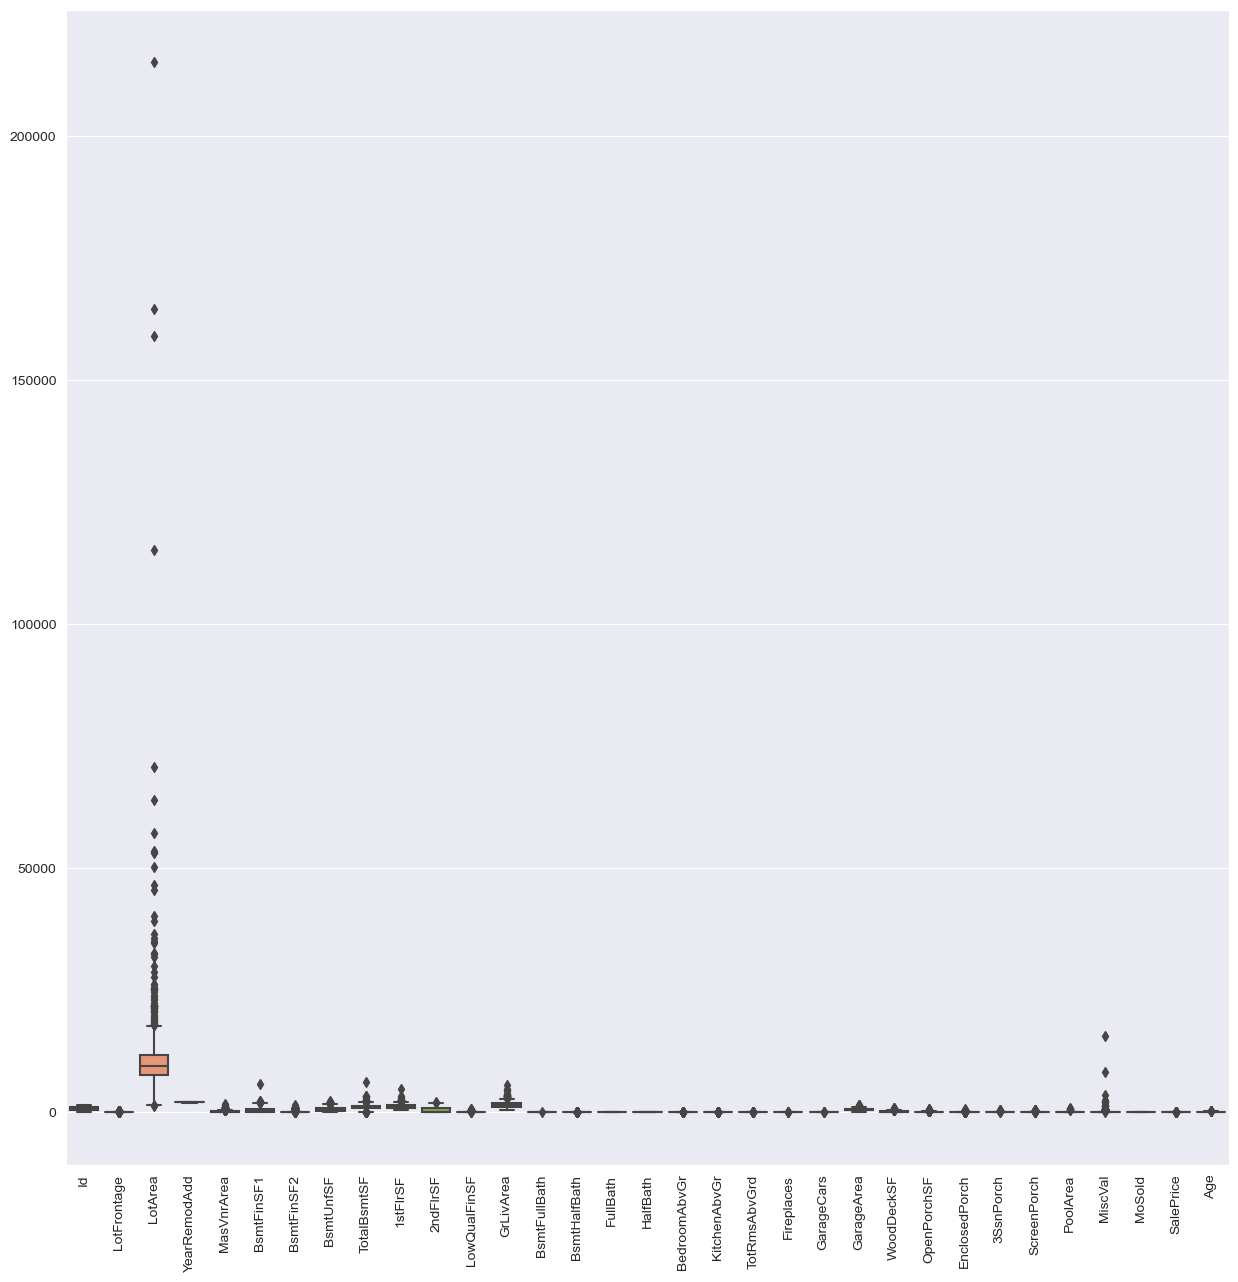

In [83]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

In [85]:
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)
    

<Axes: >

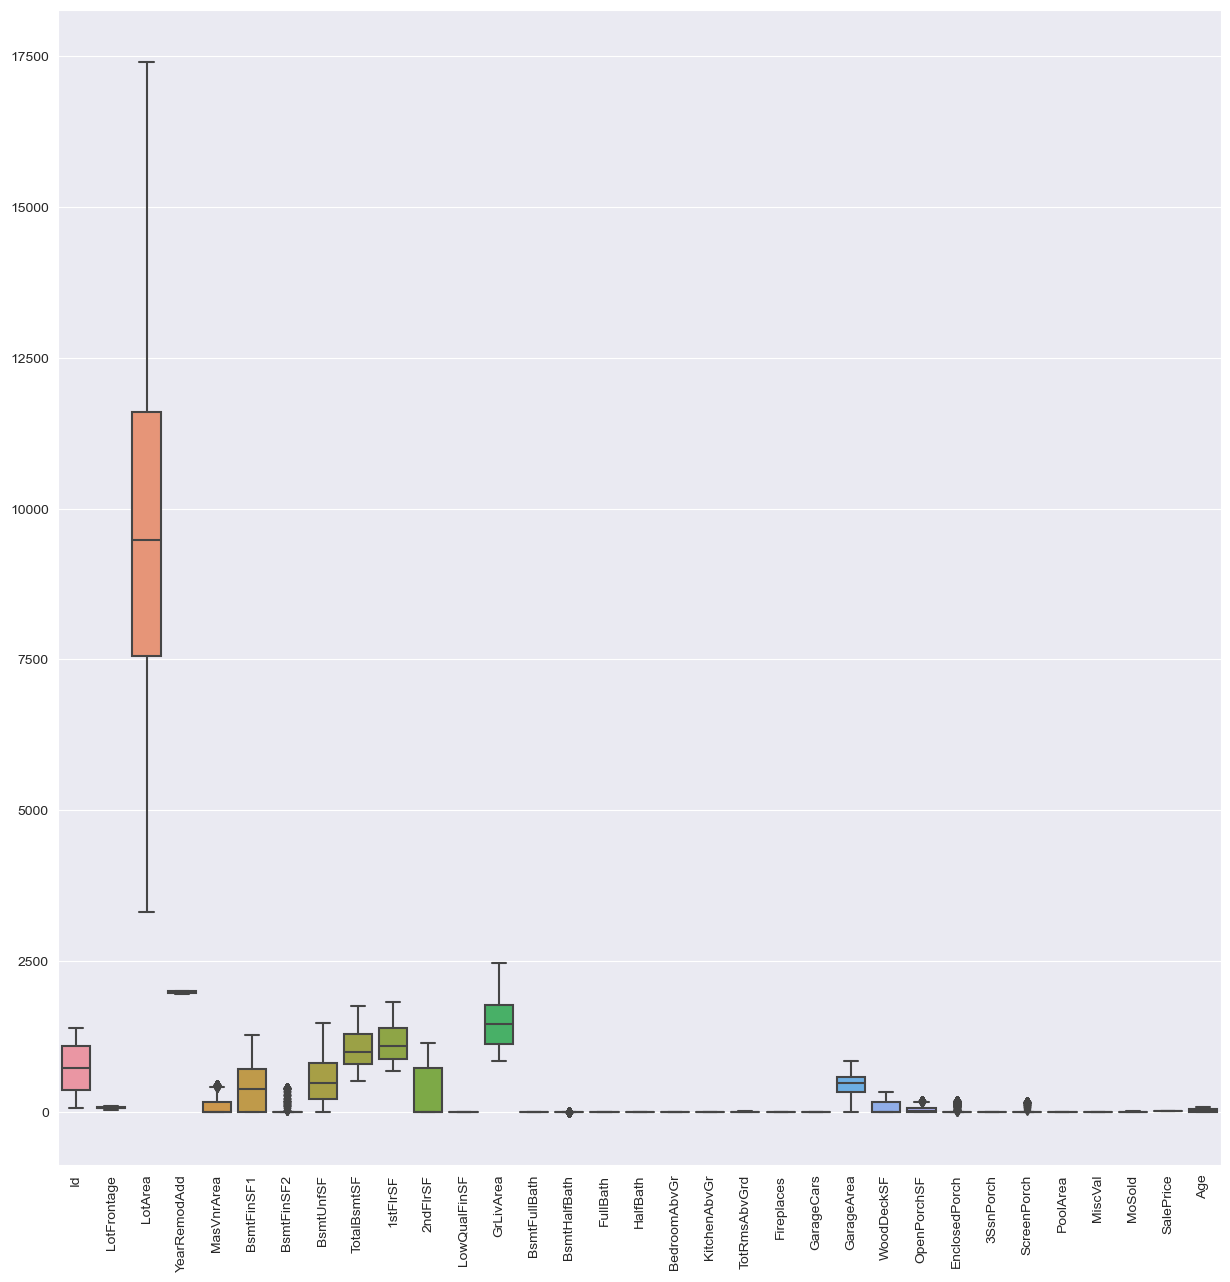

In [86]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

In [87]:
df = pd.concat([df_num,df_cat_encoded], axis = 1)
df.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,73.95,65.0,8450.0,2003,196.0,706,0.0,150,856.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,73.95,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,73.95,68.0,11250.0,2002,162.0,486,0.0,434,920.0,920.0,...,0,0,0,0,1,0,0,0,1,0
3,73.95,60.0,9550.0,1970,0.0,216,0.0,540,756.0,961.0,...,0,0,0,0,1,0,0,0,0,0
4,73.95,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1145.0,...,0,0,0,0,1,0,0,0,1,0


# STEP 5: Model Building

In [88]:
# Splitting the variables as dependent and independent variables

X = df.drop(["Id","SalePrice"],axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,196.0,706,0.0,150,856.0,856.0,854.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,1262.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2002,162.0,486,0.0,434,920.0,920.0,866.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1970,0.0,216,0.0,540,756.0,961.0,756.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1145.0,1053.0,...,0,0,0,0,1,0,0,0,1,0


In [89]:
y = df['SalePrice'].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [90]:
# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [91]:
print(X_train.shape)
print(y_train.shape)

(1168, 384)
(1168,)


In [92]:
print(X_test.shape)
print(y_test.shape)

(292, 384)
(292,)


In [93]:
#Scaling
num_cols = list(X_train.select_dtypes(include=['int64','float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [94]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## STEP 6: RIDGE REGRESSION

In [95]:
def metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    '''
   
    metric = []
    
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    
    return metric

In [96]:
# Building ridge model

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
ridgeCV.best_params_

{'alpha': 10.0}

In [98]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.07113585, 0.0610045 , 0.04830647, 0.04895706, 0.05046353,
        0.0698926 , 0.06842408, 0.05121174, 0.05831361, 0.05838122,
        0.04936013, 0.05130825, 0.04474187, 0.04870706, 0.0642138 ,
        0.05457349, 0.08667665, 0.05125885, 0.05333457, 0.05492296,
        0.05086045, 0.05071249, 0.06104903, 0.05309696, 0.05559015,
        0.07653804, 0.05562615, 0.04712238]),
 'std_fit_time': array([0.00435419, 0.00311051, 0.00644277, 0.00576149, 0.00844577,
        0.00500293, 0.01754913, 0.00486078, 0.00758952, 0.0072313 ,
        0.00230039, 0.00497671, 0.00542934, 0.0066169 , 0.0189274 ,
        0.01422281, 0.02259045, 0.00413369, 0.00379146, 0.01133967,
        0.01006648, 0.00347118, 0.00498677, 0.00716744, 0.00758708,
        0.02255432, 0.0119876 , 0.00930692]),
 'mean_score_time': array([0.01275959, 0.01213522, 0.01068497, 0.0102376 , 0.01344104,
        0.01259303, 0.01205959, 0.01463232, 0.01212144, 0.01095285,
        0.01206093, 0.00945101, 0.011653

In [99]:
ridge = Ridge(alpha=10)

In [100]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [101]:
ridge.coef_

array([ 6.56023354e-03,  2.07307896e-02,  2.49825538e-02, -2.40354563e-03,
        1.00177182e-02, -3.15225697e-04, -1.49039561e-02,  5.20474484e-02,
        7.45664130e-03,  2.88435254e-02,  0.00000000e+00,  8.85807944e-02,
        8.24181724e-03, -4.24723298e-04,  1.17438229e-02,  1.25064397e-02,
        4.98554634e-03,  0.00000000e+00, -3.41180286e-04,  1.92127953e-02,
        1.68790936e-02,  1.67328322e-02,  1.23269319e-02,  7.87306236e-03,
        2.53822117e-03,  0.00000000e+00,  1.07139979e-02,  0.00000000e+00,
        0.00000000e+00, -7.78499263e-04, -5.04655943e-02, -4.07061234e-02,
        5.51648124e-03,  6.20801048e-04, -4.85860044e-03, -5.71150836e-03,
        3.91666483e-02,  3.10825761e-02,  7.08003745e-04,  4.75844066e-03,
       -3.48924107e-02,  5.93672173e-03, -5.14776147e-02, -1.19237188e-02,
       -1.79847431e-02,  3.50102825e-02,  1.44037721e-02,  1.11946464e-02,
       -2.40515945e-02, -5.34877888e-03, -5.46542710e-03,  1.64560909e-02,
        1.08365421e-02, -

In [102]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [105]:
ridge_metrics = metrics(y_train,y_train_pred,y_test,y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.53
RSS (Test) = 2.87
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


### Getting the R2 score against different values of alpha for both train and test sets

In [106]:
ridgeCV_results = pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071136,0.004354,0.012760,0.004042,0.0001,{'alpha': 0.0001},-0.081673,-0.101828,-0.099273,-0.096434,...,-0.093848,0.007247,27,-0.050141,-0.047046,-0.049716,-0.048656,-0.050523,-0.049216,0.001252
1,0.061004,0.003111,0.012135,0.003886,0.001,{'alpha': 0.001},-0.081586,-0.100936,-0.097448,-0.096137,...,-0.092955,0.006952,26,-0.050186,-0.047090,-0.049807,-0.048683,-0.050567,-0.049267,0.001257
2,0.048306,0.006443,0.010685,0.001320,0.01,{'alpha': 0.01},-0.080603,-0.098118,-0.096195,-0.093890,...,-0.091029,0.006570,24,-0.050525,-0.047447,-0.049991,-0.048910,-0.050870,-0.049549,0.001242
3,0.048957,0.005761,0.010238,0.000351,0.05,{'alpha': 0.05},-0.080104,-0.094781,-0.094142,-0.089630,...,-0.088710,0.005583,23,-0.051380,-0.048349,-0.050284,-0.049557,-0.051367,-0.050187,0.001149
4,0.050464,0.008446,0.013441,0.003080,0.1,{'alpha': 0.1},-0.079578,-0.092349,-0.092476,-0.087975,...,-0.087215,0.005006,22,-0.051928,-0.048977,-0.050526,-0.050098,-0.051739,-0.050653,0.001090
5,0.069893,0.005003,0.012593,0.002813,0.2,{'alpha': 0.2},-0.078602,-0.089576,-0.090176,-0.086364,...,-0.085334,0.004456,21,-0.052536,-0.049725,-0.050884,-0.050716,-0.052282,-0.051229,0.001045
6,0.068424,0.017549,0.012060,0.003999,0.3,{'alpha': 0.3},-0.077658,-0.087865,-0.088637,-0.085487,...,-0.084039,0.004261,20,-0.052908,-0.050268,-0.051158,-0.051115,-0.052701,-0.051630,0.001012
7,0.051212,0.004861,0.014632,0.007983,0.4,{'alpha': 0.4},-0.076766,-0.086746,-0.087422,-0.084962,...,-0.083059,0.004225,19,-0.053212,-0.050674,-0.051392,-0.051402,-0.053051,-0.051946,0.001005
8,0.058314,0.007590,0.012121,0.004360,0.5,{'alpha': 0.5},-0.075957,-0.085866,-0.086434,-0.084655,...,-0.082266,0.004258,17,-0.053475,-0.050982,-0.051588,-0.051638,-0.053344,-0.052205,0.001011
9,0.058381,0.007231,0.010953,0.001806,0.6,{'alpha': 0.6},-0.075217,-0.085126,-0.085603,-0.084392,...,-0.081586,0.004314,16,-0.053706,-0.051237,-0.051773,-0.051848,-0.053592,-0.052431,0.001017


### Plotting R2 score vs alpha values

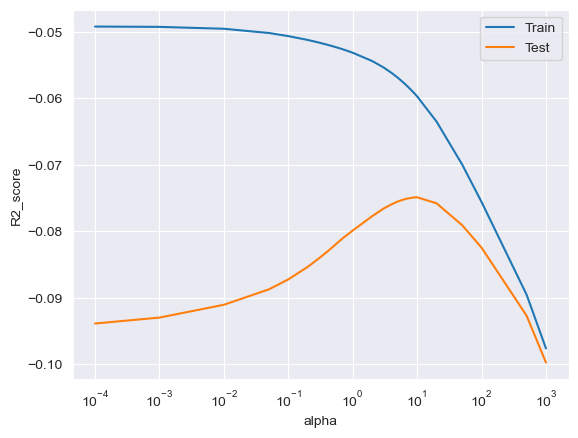

In [107]:
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### As the alpha increases the train error will decrease

## STEP 6: Lasso Model Building

In [108]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
lassoCV.best_params_

{'alpha': 0.001}

In [110]:
lassoCV.cv_results_

{'mean_fit_time': array([0.38080974, 0.11515293, 0.04925299, 0.06457705, 0.03719759,
        0.03544292, 0.03832703, 0.02543702, 0.0283462 , 0.02427182,
        0.03043246, 0.0318985 , 0.03001142, 0.03125339, 0.02907944,
        0.02859302, 0.03261571, 0.03339372, 0.02860789, 0.02307839,
        0.02633324, 0.0225316 , 0.02860603, 0.02392635, 0.03323307,
        0.02690778, 0.02988458, 0.0219892 ]),
 'std_fit_time': array([0.04857218, 0.04706512, 0.00755217, 0.01124939, 0.0032291 ,
        0.00610227, 0.00661174, 0.00133403, 0.00673091, 0.00442417,
        0.00348768, 0.00382302, 0.00635136, 0.00267826, 0.0064911 ,
        0.00586121, 0.00415129, 0.00505484, 0.00463148, 0.00128879,
        0.00232092, 0.00304062, 0.00489684, 0.00570528, 0.00820497,
        0.01074811, 0.00776505, 0.00618613]),
 'mean_score_time': array([0.01179385, 0.01533108, 0.01479797, 0.0164207 , 0.01322613,
        0.01138096, 0.01211238, 0.0093997 , 0.00969028, 0.00971193,
        0.01206079, 0.01130366, 0.014155

In [111]:
lasso = Lasso(alpha=0.001)

In [112]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [113]:
lasso.coef_

array([ 3.32682408e-03,  2.16451599e-02,  2.86137657e-02, -0.00000000e+00,
        2.58744193e-02,  1.54710949e-03, -0.00000000e+00,  4.26216769e-02,
       -0.00000000e+00,  1.06155389e-02,  0.00000000e+00,  1.06041784e-01,
        9.12081960e-03,  0.00000000e+00,  6.21173109e-03,  9.99869860e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25705165e-02,
        1.92103380e-02,  1.94273494e-02,  1.12714413e-02,  7.92455346e-03,
        1.78530093e-03,  0.00000000e+00,  1.05985103e-02,  0.00000000e+00,
        0.00000000e+00, -7.58249012e-05, -5.22898052e-02, -3.01060185e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.05179688e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64536115e-02,  0.00000000e+00, -4.41801750e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77888104e-03,  0.00000000e+00,  0.00000000e+00,
       -3.73748455e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

### Make Predictions

In [114]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [116]:
lasso_metrics = metrics(y_train,y_train_pred,y_test,y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 11.29
RSS (Test) = 2.92
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


In [117]:
### Plotting R2 score against different values of alpha for both train and test sets

In [118]:
lassoCV_results = pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.380810,0.048572,0.011794,0.000972,0.0001,{'alpha': 0.0001},-0.069359,-0.081482,-0.081075,-0.081927,...,-0.078134,0.004753,2,-0.056185,-0.053654,-0.053858,-0.054045,-0.055400,-0.054628,0.000990
1,0.115153,0.047065,0.015331,0.002519,0.001,{'alpha': 0.001},-0.068861,-0.081934,-0.078314,-0.080142,...,-0.076049,0.005172,1,-0.071447,-0.066902,-0.068326,-0.068838,-0.070007,-0.069104,0.001538
2,0.049253,0.007552,0.014798,0.003033,0.01,{'alpha': 0.01},-0.091298,-0.110751,-0.100678,-0.104328,...,-0.099472,0.007786,3,-0.098851,-0.094454,-0.096974,-0.096364,-0.099009,-0.097130,0.001689
3,0.064577,0.011249,0.016421,0.005718,0.05,{'alpha': 0.05},-0.109268,-0.132709,-0.129491,-0.126993,...,-0.122396,0.009262,4,-0.122950,-0.118050,-0.121625,-0.120657,-0.122787,-0.121214,0.001787
4,0.037198,0.003229,0.013226,0.003722,0.1,{'alpha': 0.1},-0.144592,-0.168175,-0.180403,-0.164885,...,-0.161791,0.012736,5,-0.164458,-0.157521,-0.160557,-0.159796,-0.161292,-0.160725,0.002255
5,0.035443,0.006102,0.011381,0.003587,0.2,{'alpha': 0.2},-0.239648,-0.251524,-0.277194,-0.255624,...,-0.251451,0.015167,6,-0.256051,-0.249270,-0.250132,-0.247912,-0.251069,-0.250887,0.002783
6,0.038327,0.006612,0.012112,0.003083,0.3,{'alpha': 0.3},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
7,0.025437,0.001334,0.009400,0.000331,0.4,{'alpha': 0.4},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
8,0.028346,0.006731,0.009690,0.000768,0.5,{'alpha': 0.5},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
9,0.024272,0.004424,0.009712,0.000559,0.6,{'alpha': 0.6},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211


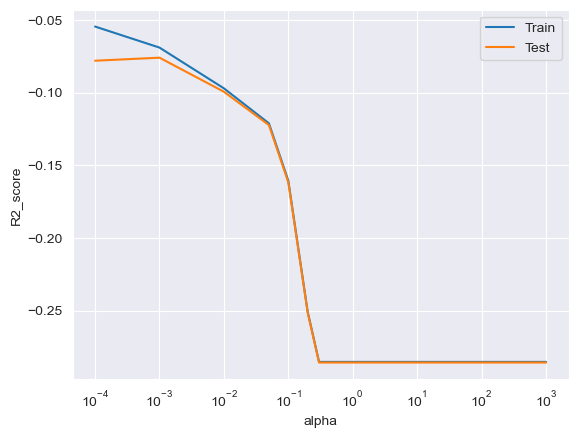

In [119]:
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

## STEP 6: Ridge Vs Lasso

In [121]:
RL_table = {
            'Metric': ['R2 Score (Train)', 'R2 Score (Test)',
                       'RSS(Train)','RSS (Test)','MSE (Train)','MSE(Test)','RMSE(Train)','RMSE(TEST)'],
            'Ridge Regression': ridge_metrics,
            'Lasso Regression': lasso_metrics
           }

final_metric = pd.DataFrame(RL_table,columns=['Metric','Ridge Regression','Lasso Regression'])
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.940096,0.920713
R2 Score (Test),0.926539,0.925125
RSS(Train),8.527638,11.286963
RSS (Test),2.865468,2.920650
MSE (Train),0.007301,0.009663
MSE(Test),0.009813,0.010002
RMSE(Train),0.085446,0.098303
RMSE(TEST),0.099062,0.100011


In [122]:
# Changes after regularization

reg_data = pd.DataFrame(index=X.columns)
reg_data.rows = X.columns
reg_data

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [123]:
reg_data['Ridge'] = ridge.coef_
reg_data['Lasso'] = lasso.coef_

In [124]:
reg_data

,Ridge,Lasso
LotFrontage,0.006560,0.003327
LotArea,0.020731,0.021645
YearRemodAdd,0.024983,0.028614
MasVnrArea,-0.002404,-0.000000
BsmtFinSF1,0.010018,0.025874
...,...,...
SaleCondition_AdjLand,0.019512,0.000000
SaleCondition_Alloca,0.064693,0.000000
SaleCondition_Family,-0.008956,-0.000000
SaleCondition_Normal,0.033810,0.015900


In [125]:
reg_data[reg_data['Lasso'] == 0]

,Ridge,Lasso
MasVnrArea,-0.002404,-0.0
BsmtUnfSF,-0.014904,-0.0
1stFlrSF,0.007457,-0.0
LowQualFinSF,0.000000,0.0
BsmtHalfBath,-0.000425,0.0
...,...,...
SaleType_Oth,0.016300,0.0
SaleType_WD,-0.001463,-0.0
SaleCondition_AdjLand,0.019512,0.0
SaleCondition_Alloca,0.064693,0.0


### Out of 384 have been removed by Lasso.Features selected by Lasso are

In [128]:
reg_data.loc[reg_data['Lasso']!=0,'Lasso']

LotFrontage              0.003327
LotArea                  0.021645
YearRemodAdd             0.028614
BsmtFinSF1               0.025874
BsmtFinSF2               0.001547
                           ...   
GarageType_Attchd        0.015892
GarageYrBlt_2009         0.004076
GarageFinish_Unf        -0.005701
SaleCondition_Normal     0.015900
SaleCondition_Partial    0.020698
Name: Lasso, Length: 78, dtype: float64

# STEP 8 : Inferences

In [134]:
reg_data['Ridge'].sort_values(ascending=False)

GrLivArea               0.088581
OverallQual_9           0.080611
OverallQual_8           0.076786
Neighborhood_Crawfor    0.075973
OverallCond_9           0.074326
                          ...   
Age                    -0.050466
MSSubClass_160         -0.051478
OverallQual_4          -0.057659
Neighborhood_MeadowV   -0.067944
OverallCond_3          -0.068966
Name: Ridge, Length: 384, dtype: float64

In [135]:
ridgeCoeff = np.exp(reg_data['Ridge'])
ridgeCoeff.sort_values(ascending=False)

GrLivArea               1.092623
OverallQual_9           1.083949
OverallQual_8           1.079811
Neighborhood_Crawfor    1.078933
OverallCond_9           1.077158
                          ...   
Age                     0.950787
MSSubClass_160          0.949825
OverallQual_4           0.943972
Neighborhood_MeadowV    0.934313
OverallCond_3           0.933358
Name: Ridge, Length: 384, dtype: float64

In [136]:
reg_data['Lasso'].sort_values(ascending=False)

OverallQual_9           0.123148
GrLivArea               0.106042
OverallQual_8           0.102004
Neighborhood_Crawfor    0.085739
Exterior1st_BrkFace     0.075454
                          ...   
MSSubClass_160         -0.044180
Age                    -0.052290
OverallQual_4          -0.055457
OverallCond_4          -0.063493
OverallCond_3          -0.070688
Name: Lasso, Length: 384, dtype: float64

In [137]:
LassoCoeff = np.exp(reg_data['Lasso'])
LassoCoeff.sort_values(ascending=False)

OverallQual_9           1.131052
GrLivArea               1.111868
OverallQual_8           1.107388
Neighborhood_Crawfor    1.089522
Exterior1st_BrkFace     1.078374
                          ...   
MSSubClass_160          0.956782
Age                     0.949054
OverallQual_4           0.946053
OverallCond_4           0.938481
OverallCond_3           0.931753
Name: Lasso, Length: 384, dtype: float64

In [139]:
df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=386)

## 1) The significant variables in predicting the price of a hourse are
        a) GrLivArea
        b) OverallQual_9
        c) OverallCond_9
        d) OverQual_8
        e) Neighborhood_Crawfor
        f) Functional_Typ
        g) Exterior1st_BrkFace
        h) SaleCondition_Alloca
        i) CentralAir_Y
        j) TotalBsmtSF
        k) Conditional_Norm
        l) Neighborhood_Somerst
## 2) GrLivArea an increase of 1 square foot of house area above ground the price will increase 
## 3) If the overall material and finish of the house is good [OverallQual_9 and OverallQual_8] price of house will increase 
## 4) If the Neighborhood_Crawfor is a nearby location then the price of house will increase 
## 5) If the functionality of home is typical then the price of house will increase 
## 6) If the exterior covering on the house is Brick Face the price of house will increase 

-----

# Assignment Part-II

Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [140]:
# The ridge regression model with double value of alpha

ridge = Ridge(alpha=20)
ridge.fit(X_train,y_train)

Ridge(alpha=20)

In [141]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [143]:
ridge_metrics = metrics(y_train,y_train_pred,y_test,y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
RSS (Train) = 9.37
RSS (Test) = 2.82
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [144]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

Lasso(alpha=0.002)

In [145]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [147]:
lasso_metrics = metrics(y_train,y_train_pred,y_test,y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 13.49
RSS (Test) = 3.45
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


In [148]:
RL_table = {
            'Metric': ['R2 Score (Train)', 'R2 Score (Test)',
                       'RSS(Train)','RSS (Test)','MSE (Train)','MSE(Test)','RMSE(Train)','RMSE(TEST)'],
            'Ridge Regression': ridge_metrics,
            'Lasso Regression': lasso_metrics
           }

final_metric = pd.DataFrame(RL_table,columns=['Metric','Ridge Regression','Lasso Regression'])
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.934148,0.905235
R2 Score (Test),0.927674,0.911638
RSS(Train),9.374311,13.490241
RSS (Test),2.821199,3.446734
MSE (Train),0.008026,0.011550
MSE(Test),0.009662,0.011804
RMSE(Train),0.089588,0.107470
RMSE(TEST),0.098294,0.108646


In [149]:
reg_data = pd.DataFrame(index=X.columns)
reg_data.rows = X.columns
reg_data

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [150]:
reg_data['Ridge'] = ridge.coef_
reg_data['Lasso'] = lasso.coef_

In [151]:
reg_data

,Ridge,Lasso
LotFrontage,0.006777,0.002842
LotArea,0.021126,0.024271
YearRemodAdd,0.027276,0.036476
MasVnrArea,-0.001382,-0.000000
BsmtFinSF1,0.015460,0.027501
...,...,...
SaleCondition_AdjLand,0.010126,0.000000
SaleCondition_Alloca,0.038925,0.000000
SaleCondition_Family,-0.008599,-0.000000
SaleCondition_Normal,0.029919,0.000800


In [152]:
ridge_coeffs = np.exp(reg_data['Ridge'])
ridge_coeffs.sort_values(ascending=False)

GrLivArea               1.083746
OverallQual_8           1.071954
OverallQual_9           1.066865
Neighborhood_Crawfor    1.066363
Functional_Typ          1.064234
                          ...   
OverallCond_4           0.954797
Neighborhood_MeadowV    0.954299
Neighborhood_Edwards    0.954071
OverallCond_3           0.948815
OverallQual_4           0.948289
Name: Ridge, Length: 384, dtype: float64

In [153]:
reg_data['Lasso'].sort_values(ascending=False)

GrLivArea               0.108435
OverallQual_8           0.084391
OverallQual_9           0.077080
Functional_Typ          0.071746
Neighborhood_Crawfor    0.066749
                          ...   
Neighborhood_Edwards   -0.026164
MSZoning_RM            -0.030493
OverallCond_4          -0.042877
Age                    -0.045832
OverallQual_4          -0.049504
Name: Lasso, Length: 384, dtype: float64

In [154]:
lasso_coeffs = np.exp(reg_data['Lasso'])
lasso_coeffs.sort_values(ascending=False)

GrLivArea               1.114532
OverallQual_8           1.088054
OverallQual_9           1.080128
Functional_Typ          1.074382
Neighborhood_Crawfor    1.069027
                          ...   
Neighborhood_Edwards    0.974175
MSZoning_RM             0.969967
OverallCond_4           0.958029
Age                     0.955203
OverallQual_4           0.951701
Name: Lasso, Length: 384, dtype: float64

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [160]:
first_five = ['OverallQual_9','GrLivArea','OverallQual_8','Neighborhood_Crawfor','Exterior1st_BrkFace']

In [161]:
X_train_dropped = X_train.drop(first_five,axis=1)
X_test_dropped = X_test.drop(first_five,axis=1)

In [162]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [163]:
lassoCV.best_params_

{'alpha': 0.001}

In [164]:
lasso = Lasso(alpha=0.001)

In [166]:
lasso.fit(X_train_dropped,y_train)

Lasso(alpha=0.001)

In [167]:
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [168]:
lasso_metircs = metrics(y_train,y_train_pred,y_test,y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 12.75
RSS (Test) = 3.02
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


In [179]:
RL_table = {
            'Metric': ['R2 Score (Train)', 'R2 Score (Test)',
                       'RSS(Train)','RSS (Test)','MSE (Train)','MSE(Test)','RMSE(Train)','RMSE(TEST)'],
            'Lasso Regression': lasso_metrics
           }

final_metric = pd.DataFrame(RL_table,columns=['Metric','Lasso Regression'])
final_metric.set_index('Metric')

,Lasso Regression
Metric,
R2 Score (Train),0.905235
R2 Score (Test),0.911638
RSS(Train),13.490241
RSS (Test),3.446734
MSE (Train),0.011550
MSE(Test),0.011804
RMSE(Train),0.107470
RMSE(TEST),0.108646


In [180]:
re_data = pd.DataFrame(index=X_train_dropped.columns)
re_data.rows = X_train_dropped.columns
re_data

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [181]:
re_data['Lasso'] = lasso.coef_

In [182]:
re_data

,Lasso
LotFrontage,0.003512
LotArea,0.023132
YearRemodAdd,0.026192
MasVnrArea,-0.000000
BsmtFinSF1,0.028145
...,...
SaleCondition_AdjLand,0.000000
SaleCondition_Alloca,0.000000
SaleCondition_Family,-0.000000
SaleCondition_Normal,0.018779


In [183]:
re_data['Lasso'].sort_values(ascending=False)

2ndFlrSF                0.098102
Functional_Typ          0.073546
1stFlrSF                0.073456
MSSubClass_70           0.061023
Neighborhood_Somerst    0.056671
                          ...   
OverallQual_3          -0.065478
OverallCond_4          -0.066445
OverallQual_5          -0.077234
OverallCond_3          -0.079508
OverallQual_4          -0.103159
Name: Lasso, Length: 379, dtype: float64